<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Goal" data-toc-modified-id="Goal-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Goal</a></span></li><li><span><a href="#Var" data-toc-modified-id="Var-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Var</a></span></li><li><span><a href="#Init" data-toc-modified-id="Init-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Init</a></span></li><li><span><a href="#Load" data-toc-modified-id="Load-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Load</a></span></li><li><span><a href="#LLMGPS-(5-mil-reads)" data-toc-modified-id="LLMGPS-(5-mil-reads)-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>LLMGPS (5 mil reads)</a></span><ul class="toc-item"><li><span><a href="#Number-of-samples" data-toc-modified-id="Number-of-samples-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Number of samples</a></span></li><li><span><a href="#Config" data-toc-modified-id="Config-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Config</a></span></li><li><span><a href="#Run" data-toc-modified-id="Run-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Run</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Summary</a></span><ul class="toc-item"><li><span><a href="#Distribution-among-samples" data-toc-modified-id="Distribution-among-samples-5.4.1"><span class="toc-item-num">5.4.1&nbsp;&nbsp;</span>Distribution among samples</a></span></li></ul></li></ul></li><li><span><a href="#LLMGPS-(10-mil-reads)" data-toc-modified-id="LLMGPS-(10-mil-reads)-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>LLMGPS (10 mil reads)</a></span><ul class="toc-item"><li><span><a href="#Writing-samples-file" data-toc-modified-id="Writing-samples-file-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Writing samples file</a></span></li><li><span><a href="#Config" data-toc-modified-id="Config-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Config</a></span></li><li><span><a href="#Run" data-toc-modified-id="Run-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Run</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Summary</a></span><ul class="toc-item"><li><span><a href="#Distribution-among-samples" data-toc-modified-id="Distribution-among-samples-6.4.1"><span class="toc-item-num">6.4.1&nbsp;&nbsp;</span>Distribution among samples</a></span></li></ul></li></ul></li><li><span><a href="#LLMGPS-(20-mil-reads)" data-toc-modified-id="LLMGPS-(20-mil-reads)-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>LLMGPS (20 mil reads)</a></span><ul class="toc-item"><li><span><a href="#Writing-samples-table" data-toc-modified-id="Writing-samples-table-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Writing samples table</a></span></li><li><span><a href="#Config" data-toc-modified-id="Config-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Config</a></span><ul class="toc-item"><li><span><a href="#Run" data-toc-modified-id="Run-7.2.1"><span class="toc-item-num">7.2.1&nbsp;&nbsp;</span>Run</a></span></li></ul></li><li><span><a href="#Summary" data-toc-modified-id="Summary-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Summary</a></span><ul class="toc-item"><li><span><a href="#Distribution-among-samples" data-toc-modified-id="Distribution-among-samples-7.3.1"><span class="toc-item-num">7.3.1&nbsp;&nbsp;</span>Distribution among samples</a></span></li></ul></li></ul></li><li><span><a href="#sessionInfo" data-toc-modified-id="sessionInfo-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>sessionInfo</a></span></li></ul></div>

# Goal

* DEMIC analysis on all MAGs
  * inferring growth rates in MGnify dataset

# Var

In [1]:
# Dereplicated MAGs
MAG_dir = file.path('/ebio', 'abt3_projects', 'Georg_animal_feces', 'data',
                     'metagenome', 'multi-study', 'BioProjects', 'summary',
                     'LLMGA', 'wGeorgAnimal', 'drep-0.95')

# de-rep'd MAG metadata
MAG_meta_file = file.path(MAG_dir, 'drep-MAG_metadata.tsv')

# MGnify dataset metadata
MGnify_meta_file = '/ebio/abt3_projects/databases_no-backup/MGnify/190900_dataset/LLMGQC//final/sample_qc_data.tsv'
# post-qc table of samples
MGnify_samp_file = '/ebio/abt3_projects/databases_no-backup/MGnify/190900_dataset/LLMGQC/final/samples.txt'

# working dir
work_dir = file.path(MAG_dir, 'MGnify-host-env')

# Init

In [4]:
library(dplyr)
library(tidyr)
library(ggplot2)
library(data.table)
library(doParallel)

source('/ebio/abt3_projects/Georg_animal_feces/code/misc_r_functions/init.R')

In [3]:
dt.dims()
make_dir(work_dir)

Directory already exists: /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/MGnify-host-env 


# Load

In [5]:
# MGnify dataset metadata
MGnify_meta = read.delim(MGnify_meta_file, sep='\t') %>%
    dplyr::select(-Description)
MGnify_meta 

Sample,C,LR,modelR,LRstar,diversity,Sample.y,Filename,File.type,Encoding,⋯,analysis_id,raw_seq_count,instrument,study,paired_reads,n,rand_sample,category,bioproject_primary,bioproject_secundary
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<int>,<fct>,<fct>,<int>,<int>,<int>,<int>,<fct>,<fct>
ERS723591,0.9475353,2001491181,0.9997791,1549349813,17.26604,ERS723591 | fastqc_per_sample | R1_final,R1_final.fq.gz,Conventional base calls,Sanger / Illumina 1.9,⋯,MGYA00128605,46354787,Illumina HiSeq 2000,MGYS00001796,23177393,88,30,1,PRJEB9357,ERP010448
ERS723612,0.9363293,1787464007,0.9997541,1476517886,17.34965,ERS723612 | fastqc_per_sample | R1_final,R1_final.fq.gz,Conventional base calls,Sanger / Illumina 1.9,⋯,MGYA00128574,36717477,Illumina HiSeq 2000,MGYS00001796,18358738,88,30,1,PRJEB9357,ERP010448
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
ERS970222,0.7149372,3072212568,0.9996071,44631146024,20.12179,ERS970222 | fastqc_per_sample | R1_final,R1_final.fq.gz,Conventional base calls,Sanger / Illumina 1.9,⋯,MGYA00074751,68996017,Illumina HiSeq 2000,MGYS00001225,34498008,516,30,25,PRJEB11755,ERP013165
ERS970335,0.5646210,3149904686,0.9996862,96409979631,21.29299,ERS970335 | fastqc_per_sample | R1_final,R1_final.fq.gz,Conventional base calls,Sanger / Illumina 1.9,⋯,MGYA00074582,70443585,Illumina HiSeq 2000,MGYS00001225,35221792,516,30,25,PRJEB11755,ERP013165


In [6]:
# MGnify dataset post-QC samples
MGnify_samp = read.delim(MGnify_samp_file, sep='\t') %>%
    inner_join(MGnify_meta, c('Sample'))
MGnify_samp

Warning message:
“Column `Sample` joining factors with different levels, coercing to character vector”


Sample,Read1,Read2,Notes,C,LR,modelR,LRstar,diversity,Sample.y,⋯,analysis_id,raw_seq_count,instrument,study,paired_reads,n,rand_sample,category,bioproject_primary,bioproject_secundary
<chr>,<fct>,<fct>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,⋯,<fct>,<int>,<fct>,<fct>,<int>,<int>,<int>,<int>,<fct>,<fct>
ERS723591,/ebio/abt3_projects/databases_no-backup/MGnify/190900_dataset/LLMGQC/final/ERS723591/R1_final.fq.gz,/ebio/abt3_projects/databases_no-backup/MGnify/190900_dataset/LLMGQC/final/ERS723591/R2_final.fq.gz,NA,0.9475353,2001491181,0.9997791,1549349813,17.26604,ERS723591 | fastqc_per_sample | R1_final,⋯,MGYA00128605,46354787,Illumina HiSeq 2000,MGYS00001796,23177393,88,30,1,PRJEB9357,ERP010448
ERS723612,/ebio/abt3_projects/databases_no-backup/MGnify/190900_dataset/LLMGQC/final/ERS723612/R1_final.fq.gz,/ebio/abt3_projects/databases_no-backup/MGnify/190900_dataset/LLMGQC/final/ERS723612/R2_final.fq.gz,NA,0.9363293,1787464007,0.9997541,1476517886,17.34965,ERS723612 | fastqc_per_sample | R1_final,⋯,MGYA00128574,36717477,Illumina HiSeq 2000,MGYS00001796,18358738,88,30,1,PRJEB9357,ERP010448
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
ERS970222,/ebio/abt3_projects/databases_no-backup/MGnify/190900_dataset/LLMGQC/final/ERS970222/R1_final.fq.gz,/ebio/abt3_projects/databases_no-backup/MGnify/190900_dataset/LLMGQC/final/ERS970222/R2_final.fq.gz,NA,0.7149372,3072212568,0.9996071,44631146024,20.12179,ERS970222 | fastqc_per_sample | R1_final,⋯,MGYA00074751,68996017,Illumina HiSeq 2000,MGYS00001225,34498008,516,30,25,PRJEB11755,ERP013165
ERS970335,/ebio/abt3_projects/databases_no-backup/MGnify/190900_dataset/LLMGQC/final/ERS970335/R1_final.fq.gz,/ebio/abt3_projects/databases_no-backup/MGnify/190900_dataset/LLMGQC/final/ERS970335/R2_final.fq.gz,NA,0.5646210,3149904686,0.9996862,96409979631,21.29299,ERS970335 | fastqc_per_sample | R1_final,⋯,MGYA00074582,70443585,Illumina HiSeq 2000,MGYS00001225,35221792,516,30,25,PRJEB11755,ERP013165


In [7]:
# MAG metadata
MAG_meta = read.delim(MAG_meta_file, sep='\t')
MAG_meta 

binID,fasta.x,Marker.lineage,X..genomes,X..markers,X..marker.sets,Completeness,Contamination,Strain.heterogeneity,Genome.size..bp.,⋯,closest_placement_taxonomy,closest_placement_ani,closest_placement_af,pplacer_taxonomy,classification_method,note,aa_percent,translation_table,red_value,warnings
<fct>,<fct>,<fct>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<int>,<fct>,<fct>
artificially_reared_1__metabat2_low_PE.002.contigs,/ebio/abt3_projects/Georg_animal_feces/data//metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/dereplicated_genomes/artificially_reared_1__metabat2_low_PE.002.contigs.fa,o__Bacteroidales (UID2657),160,491,268,92.92,3.00,28.57,3388189,⋯,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Bacteroides_A;s__Bacteroides_A sp900066445,85.72,0.61,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Bacteroides_A;s__,Placement,taxonomic classification fully defined by topology,93.33,11,0.985595897806,N/A
artificially_reared_2__maxbin2_low_prob.006.contigs,/ebio/abt3_projects/Georg_animal_feces/data//metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/dereplicated_genomes/artificially_reared_2__maxbin2_low_prob.006.contigs.fa,k__Bacteria (UID2569),434,278,186,88.60,1.11,50.00,2174315,⋯,N/A,N/A,N/A,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Paludibacteraceae;g__;s__,Placement,taxonomic classification fully defined by topology,90.20,11,0.836955988283,N/A
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
X95_Meadow_Viper__metabat2_low_PE.002.contigs,/ebio/abt3_projects/Georg_animal_feces/data//metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/dereplicated_genomes/X95_Meadow_Viper__metabat2_low_PE.002.contigs.fa,f__Enterobacteriaceae (UID5124),134,1172,336,89.06,0.94,58.33,3738913,⋯,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Citrobacter;s__Citrobacter freundii,98.83,0.94,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Citrobacter;s__,ANI/Placement,topological placement and ANI have congruent species assignments,94.35,11,N/A,N/A
X96_European_Hare__metabat2_high_PE.013.contigs,/ebio/abt3_projects/Georg_animal_feces/data//metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/dereplicated_genomes/X96_European_Hare__metabat2_high_PE.013.contigs.fa,o__Clostridiales (UID1212),172,263,149,93.83,1.45,0.00,2554075,⋯,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Oscillospirales;f__Oscillospiraceae;g__UBA5446;s__UBA5446 sp002427465,76.48,0.13,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Oscillospirales;f__Oscillospiraceae;g__;s__,Placement,taxonomic novelty determined using RED,94.40,11,0.918766142869,N/A


# LLMGPS (5 mil reads)

* Using input files from `03_MGnify_distribution.ipynb`

## Number of samples

In [8]:
# number of samples with 5mil reads
n_paired_reads_cutoff = 5e6

MGnify_samp_f = MGnify_samp  %>%
    filter(Total.Sequences >= n_paired_reads_cutoff) 

MGnify_samp_f

Sample,Read1,Read2,Notes,C,LR,modelR,LRstar,diversity,Sample.y,⋯,analysis_id,raw_seq_count,instrument,study,paired_reads,n,rand_sample,category,bioproject_primary,bioproject_secundary
<chr>,<fct>,<fct>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,⋯,<fct>,<int>,<fct>,<fct>,<int>,<int>,<int>,<int>,<fct>,<fct>
ERS723591,/ebio/abt3_projects/databases_no-backup/MGnify/190900_dataset/LLMGQC/final/ERS723591/R1_final.fq.gz,/ebio/abt3_projects/databases_no-backup/MGnify/190900_dataset/LLMGQC/final/ERS723591/R2_final.fq.gz,NA,0.9475353,2001491181,0.9997791,1549349813,17.26604,ERS723591 | fastqc_per_sample | R1_final,⋯,MGYA00128605,46354787,Illumina HiSeq 2000,MGYS00001796,23177393,88,30,1,PRJEB9357,ERP010448
ERS723612,/ebio/abt3_projects/databases_no-backup/MGnify/190900_dataset/LLMGQC/final/ERS723612/R1_final.fq.gz,/ebio/abt3_projects/databases_no-backup/MGnify/190900_dataset/LLMGQC/final/ERS723612/R2_final.fq.gz,NA,0.9363293,1787464007,0.9997541,1476517886,17.34965,ERS723612 | fastqc_per_sample | R1_final,⋯,MGYA00128574,36717477,Illumina HiSeq 2000,MGYS00001796,18358738,88,30,1,PRJEB9357,ERP010448
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
ERS970222,/ebio/abt3_projects/databases_no-backup/MGnify/190900_dataset/LLMGQC/final/ERS970222/R1_final.fq.gz,/ebio/abt3_projects/databases_no-backup/MGnify/190900_dataset/LLMGQC/final/ERS970222/R2_final.fq.gz,NA,0.7149372,3072212568,0.9996071,44631146024,20.12179,ERS970222 | fastqc_per_sample | R1_final,⋯,MGYA00074751,68996017,Illumina HiSeq 2000,MGYS00001225,34498008,516,30,25,PRJEB11755,ERP013165
ERS970335,/ebio/abt3_projects/databases_no-backup/MGnify/190900_dataset/LLMGQC/final/ERS970335/R1_final.fq.gz,/ebio/abt3_projects/databases_no-backup/MGnify/190900_dataset/LLMGQC/final/ERS970335/R2_final.fq.gz,NA,0.5646210,3149904686,0.9996862,96409979631,21.29299,ERS970335 | fastqc_per_sample | R1_final,⋯,MGYA00074582,70443585,Illumina HiSeq 2000,MGYS00001225,35221792,516,30,25,PRJEB11755,ERP013165


File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/metagenome/multi-study/08_drep95_wGeorgAnimal/.figures/3a9ec56ef22ed82e028dfb033cec592a.RDS 


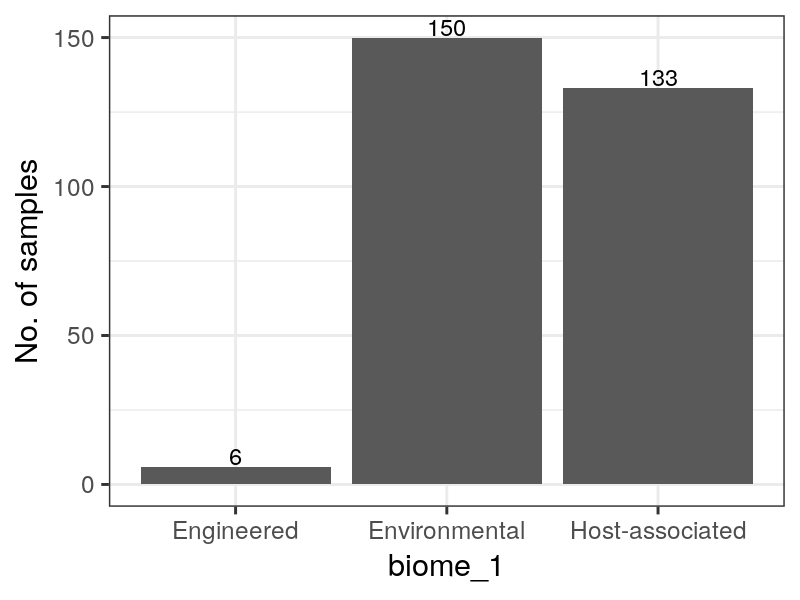

In [9]:
# plotting number of remaining samples
p = MGnify_samp_f %>%
    filter(Filename == 'R1_final.fq.gz') %>%
    dplyr::select(Sample, Total.Sequences, avg_sequence_length, bioproject_primary,
              environment_biome, environment_feature, environment_material,
              biome_0, biome_1, biome_2, biome_3, biome_4, biome_5) %>%
    group_by(biome_1) %>%
    summarize(n = n()) %>%
    ungroup() %>%
    ggplot(aes(biome_1, n, label=n)) +
    geom_bar(stat='identity', position='dodge') +
    geom_text(position=position_dodge(width=0.9), vjust=-0.1, size=3) +
    labs(y='No. of samples') +
    theme_bw() 

dims(4,3)
Plot(p)

File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/metagenome/multi-study/08_drep95_wGeorgAnimal/.figures/71658109ada47e9304d49e00d9719361.RDS 


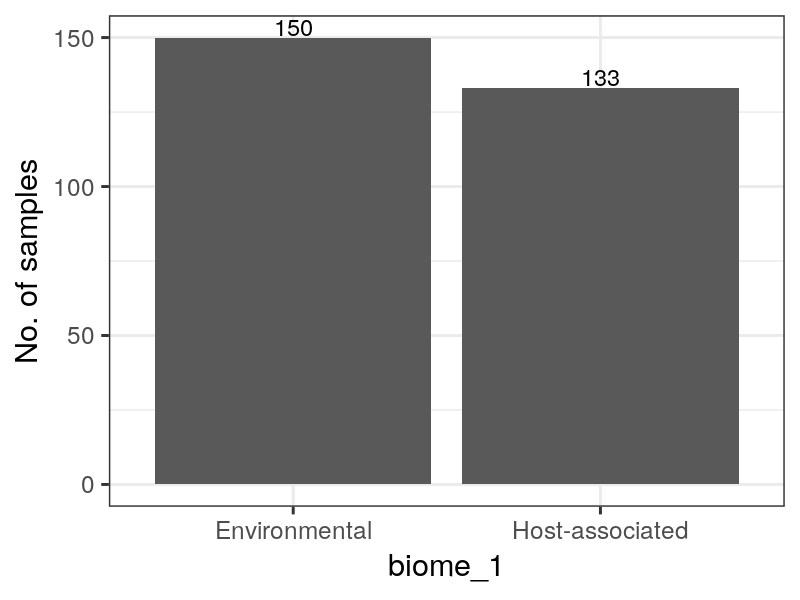

In [10]:
# plotting number of remaining samples (no engineered)
p = MGnify_samp_f %>%
    filter(Filename == 'R1_final.fq.gz',
           biome_1 != 'Engineered') %>%
    dplyr::select(Sample, Total.Sequences, avg_sequence_length, bioproject_primary,
              environment_biome, environment_feature, environment_material,
              biome_0, biome_1, biome_2, biome_3, biome_4, biome_5) %>%
    group_by(biome_1) %>%
    summarize(n = n()) %>%
    ungroup() %>%
    ggplot(aes(biome_1, n, label=n)) +
    geom_bar(stat='identity', position='dodge') +
    geom_text(position=position_dodge(width=0.9), vjust=-0.1, size=3) +
    labs(y='No. of samples') +
    theme_bw() 

dims(4,3)
Plot(p)

## Config

In [16]:
# config
config_file =  file.path(work_dir, 'config_DEMIC-5mil.yaml')
cat_file(config_file)

#-- I/O --#
# table with sample --> read_file information
samples_file: /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/MGnify-host-env/samples.tsv

# table of reference genomes; not needed for all analyses (see README.md)
genomes_db: /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/MGnify-host-env/ref_genomes.txt

# output location
#output_dir: tests/output_amy_n8/
output_dir: /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/MGnify-host-env/


# read file path
# use "None" if full file path is included in the samples_file
read_file_path: None

#-- clades to analyze with strainphlan (ALL = all clades) --#
clades:
 - ALL
# - s__Methanobrevibacter_smithii
# - s__Faecalibacterium_prausnitzii
# - g__Blautia

#-- DB --#
# metaphlan marker databse
metaphlan2_db: /ebio/abt3_projects/databases_n

## Run

```
(snakemake_dev) @ rick:/ebio/abt3_projects/Georg_animal_feces/bin/llmgps
screen -L -S llmgps-MGnify-DEMIC ./snakemake_sge.sh /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/MGnify-host-env/config_DEMIC-5mil.yaml cluster.json /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/MGnify-host-env/SGE_log 50

```

## Summary

In [11]:
demic_ptr_file = file.path(work_dir, 'demic_5mil', 'all_PTR.txt')
demic_ptr = read.delim(demic_ptr_file, sep='\t') %>%
    gather(sample, growth_rate, -X) %>%
    rename('taxon' = X)

demic_ptr$growth_rate %>% summary
demic_ptr

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   1.00    1.47    1.71    2.05    2.02   90.67  271511 

taxon,sample,growth_rate
<fct>,<chr>,<dbl>
X1_Eurasian_Beaver__metabat2_high_PE_005_contigs,DRS034400,NA
X73_One_humped_Camel__maxbin2_low_prob_008_contigs,DRS034400,NA
⋮,⋮,⋮
X240_Southern_White_cheeked_Gibbon__metabat2_low_PE_002_contigs,SRS963627,NA
SAMEA3387500__metabat2_low_PE_011_contigs,SRS963627,NA


In [12]:
# number of taxa with any growth rates
demic_ptr_f = demic_ptr %>%
    filter(!is.na(growth_rate))

demic_ptr %>% .$taxon %>% unique %>% length %>% print
demic_ptr_f %>% .$taxon %>% unique %>% length %>% print

[1] 1139
[1] 108


In [13]:
# adding sample metadata
demic_ptr_f = demic_ptr_f %>%
    inner_join(MGnify_meta, c('sample'='Sample')) 

demic_ptr_f

Warning message:
“Column `sample`/`Sample` joining character vector and factor, coercing into character vector”


taxon,sample,growth_rate,C,LR,modelR,LRstar,diversity,Sample.y,Filename,⋯,analysis_id,raw_seq_count,instrument,study,paired_reads,n,rand_sample,category,bioproject_primary,bioproject_secundary
<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,⋯,<fct>,<int>,<fct>,<fct>,<int>,<int>,<int>,<int>,<fct>,<fct>
Ash_p2__metabat2_high_PE_017_contigs,ERS1474378,2.3308,0.9225782,1333909484,0.9989786,1427758406,17.07265,ERS1474378 | fastqc_per_sample | R1_final,R1_final.fq.gz,⋯,MGYA00094722,21072775,Illumina HiSeq 2500,MGYS00001380,10536387,364,30,24,PRJEB18627,ERP020572
Ash_p2__metabat2_high_PE_017_contigs,ERS1474385,1.7681,0.8618077,1388284246,0.9989417,4370698258,18.32955,ERS1474385 | fastqc_per_sample | R1_final,R1_final.fq.gz,⋯,MGYA00094749,22178678,Illumina HiSeq 2500,MGYS00001380,11089339,364,30,24,PRJEB18627,ERP020572
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
SAMEA3663015__metabat2_low_PE_008_contigs,ERS970416,1.3465,0.5059896,1263891232,0.9995317,81080980322,20.63296,ERS970416 | fastqc_per_sample | R1_final,R1_final.fq.gz,⋯,MGYA00074420,28391725,Illumina HiSeq 2000,MGYS00001225,14195862,516,30,25,PRJEB11755,ERP013165
SAMEA3663250__metabat2_low_PE_006_contigs,ERS970416,1.2590,0.5059896,1263891232,0.9995317,81080980322,20.63296,ERS970416 | fastqc_per_sample | R1_final,R1_final.fq.gz,⋯,MGYA00074420,28391725,Illumina HiSeq 2000,MGYS00001225,14195862,516,30,25,PRJEB11755,ERP013165


In [14]:
# adding MAG metadata
demic_ptr_f = demic_ptr_f %>%
    inner_join(MAG_meta %>% mutate(binID = gsub('\\.', '_', binID)), 
               c('taxon'='binID')) %>%
    dplyr::select(-note)

demic_ptr_f

Warning message:
“Column `taxon`/`binID` joining factor and character vector, coercing into character vector”


taxon,sample,growth_rate,C,LR,modelR,LRstar,diversity,Sample.y,Filename,⋯,closest_placement_reference,closest_placement_taxonomy,closest_placement_ani,closest_placement_af,pplacer_taxonomy,classification_method,aa_percent,translation_table,red_value,warnings
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<int>,<fct>,<fct>
Ash_p2__metabat2_high_PE_017_contigs,ERS1474378,2.3308,0.9225782,1333909484,0.9989786,1427758406,17.07265,ERS1474378 | fastqc_per_sample | R1_final,R1_final.fq.gz,⋯,GCF_000741295.1,d__Bacteria;p__Actinobacteriota;c__Actinobacteria;o__Actinomycetales;f__Bifidobacteriaceae;g__Bifidobacterium;s__Bifidobacterium pseudolongum_A,96.89,0.92,d__Bacteria;p__Actinobacteriota;c__Actinobacteria;o__Actinomycetales;f__Bifidobacteriaceae;g__Bifidobacterium;s__,ANI/Placement,70.34,11,N/A,N/A
Ash_p2__metabat2_high_PE_017_contigs,ERS1474385,1.7681,0.8618077,1388284246,0.9989417,4370698258,18.32955,ERS1474385 | fastqc_per_sample | R1_final,R1_final.fq.gz,⋯,GCF_000741295.1,d__Bacteria;p__Actinobacteriota;c__Actinobacteria;o__Actinomycetales;f__Bifidobacteriaceae;g__Bifidobacterium;s__Bifidobacterium pseudolongum_A,96.89,0.92,d__Bacteria;p__Actinobacteriota;c__Actinobacteria;o__Actinomycetales;f__Bifidobacteriaceae;g__Bifidobacterium;s__,ANI/Placement,70.34,11,N/A,N/A
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
SAMEA3663015__metabat2_low_PE_008_contigs,ERS970416,1.3465,0.5059896,1263891232,0.9995317,81080980322,20.63296,ERS970416 | fastqc_per_sample | R1_final,R1_final.fq.gz,⋯,GCA_002358835.1,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__P3;g__UBA3388;s__UBA3388 sp002358835,78.2,0.28,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__P3;g__UBA3388;s__,Placement,98.35,11,0.948791786799,N/A
SAMEA3663250__metabat2_low_PE_006_contigs,ERS970416,1.2590,0.5059896,1263891232,0.9995317,81080980322,20.63296,ERS970416 | fastqc_per_sample | R1_final,R1_final.fq.gz,⋯,N/A,N/A,N/A,N/A,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__UBA2868;s__,Placement,98.21,11,0.865263880095,N/A


### Distribution among samples

In [15]:
demic_ptr_f$biome_1 %>% summary

demic_ptr_f$biome_2 %>% summary

demic_ptr_f$biome_3 %>% summary

Engineered   Environmental Host-associated 
              0               0            1849

Animal     Aquatic        Fish     Mammals Terrestrial  Wastewater 
        443           0           0        1406           0           0

Digestive system                     Freshwater 
                          1849                              0 
                        Marine Non-marine Saline and Alkaline 
                             0                              0 
              Nutrient removal                           Soil 
                             0                              0

Number of samples per MAG with non-NA values:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   2.00    8.00   17.00   17.12   26.00   38.00 

Number of MAGs: 108 
File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/metagenome/multi-study/08_drep95_wGeorgAnimal/.figures/18d4bd09bf4b33bf408797fd04d4bed2.RDS 


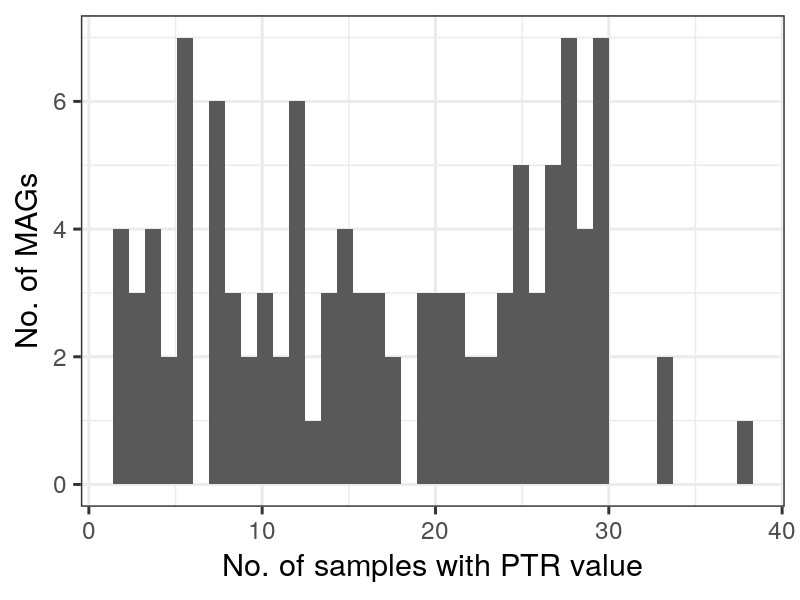

In [16]:
demic_ptr_f_s = demic_ptr_f %>%
    group_by(taxon) %>%
    summarize(n_samples = n()) %>%
    ungroup() 

cat('Number of samples per MAG with non-NA values:\n')
demic_ptr_f_s %>% .$n_samples %>% summary %>% print
cat('\n')

cat('Number of MAGs:', demic_ptr_f_s %>% .$taxon %>% unique %>% length, '\n')

p = demic_ptr_f_s %>%
    ggplot(aes(n_samples)) +
    geom_histogram(bins=40) +
    labs(x='No. of samples with PTR value', y='No. of MAGs') +
    theme_bw()

dims(4,3)
Plot(p)

File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/metagenome/multi-study/08_drep95_wGeorgAnimal/.figures/fd7c2a5105aa557f86964bd5a4a83f03.RDS 


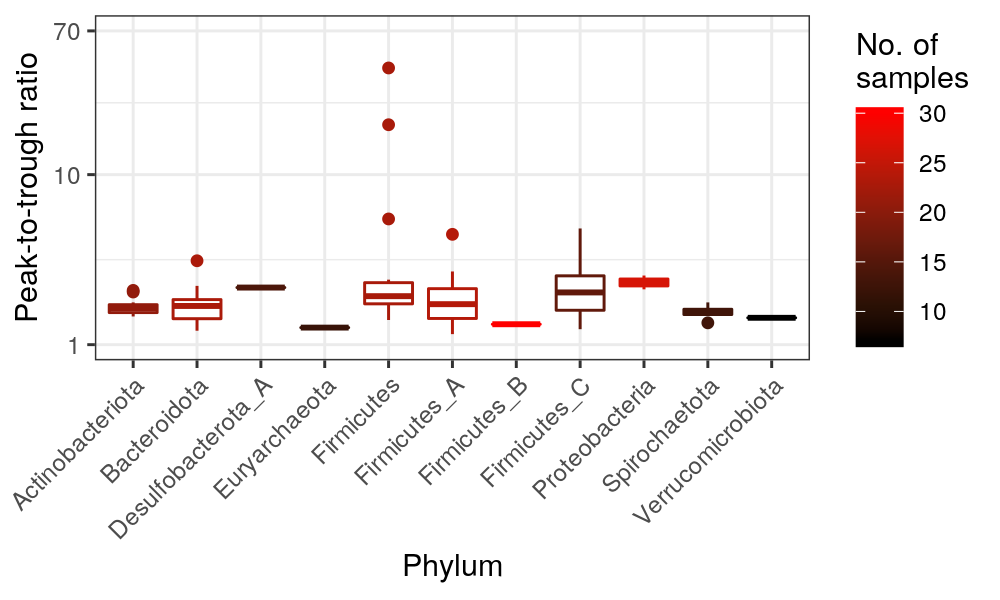

In [17]:
# PTR values for each MAG (grouped by phylum); only MAGs with >=3 PTR values shown
p = demic_ptr_f %>%
    group_by(taxon) %>%
    mutate(n_samples = n()) %>%
    ungroup() %>%
    filter(n_samples >= 3) %>%
    group_by(Phylum) %>%
    mutate(mean_n_samples = mean(n_samples)) %>%
    ungroup() %>%
    mutate(Phylum = gsub('^p__', '', Phylum)) %>%
    group_by(taxon) %>%
    summarize(growth_rate = mean(growth_rate),
              mean_n_samples = first(mean_n_samples),
              Phylum = first(Phylum)) %>%
    ungroup() %>%
    ggplot(aes(Phylum, growth_rate, color=mean_n_samples)) +
    geom_boxplot() +
    scale_color_continuous('No. of\nsamples', low='black', high='red') +
    scale_y_log10(breaks=c(1,10,70), labels=c(1,10,70), limits=c(1,70)) +
    labs(y='Peak-to-trough ratio') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=45, hjust=1)
    )

dims(5, 3)
Plot(p)

File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/metagenome/multi-study/08_drep95_wGeorgAnimal/.figures/18039089b5cde0c8ce618cdcc5b9938a.RDS 


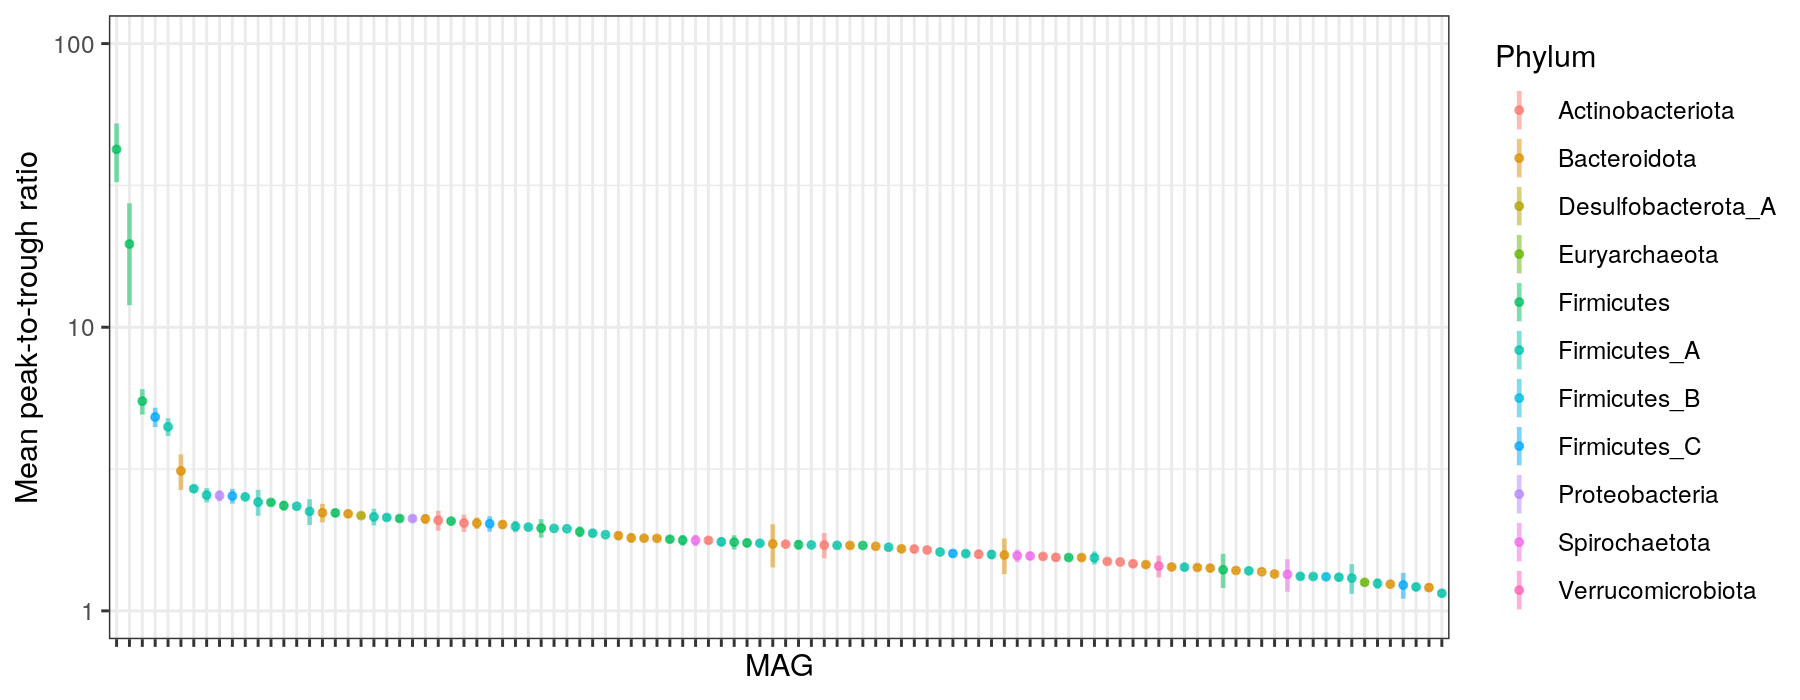

In [18]:
# PTR values for each MAG (grouped by phylum); only MAGs with >=3 PTR values shown
p = demic_ptr_f %>%
    group_by(taxon) %>%
    mutate(n_samples = n()) %>%
    ungroup() %>%
    filter(n_samples >= 3) %>%
    group_by(taxon) %>%
    summarize(mean_growth_rate = mean(growth_rate),
              sderr_growth_rate = sd(growth_rate) / sqrt(n()),
              Phylum = first(Phylum)) %>%
    ungroup() %>%
    mutate(Phylum = gsub('^p__', '', Phylum),
           taxon = taxon %>% reorder(-mean_growth_rate)) %>%
    ggplot(aes(taxon, mean_growth_rate, color=Phylum)) +
    geom_linerange(aes(ymin=mean_growth_rate-sderr_growth_rate,
                       ymax=mean_growth_rate+sderr_growth_rate),
                  alpha=0.5, size=0.8) +
    geom_point(alpha=0.7, size=1) +
    scale_y_log10(breaks=c(1,10,100), labels=c(1,10,100), limits=c(1,100)) +
    labs(x='MAG', y='Mean peak-to-trough ratio') +
    theme_bw() +
    theme(
        axis.text.x = element_blank() 
    )

dims(9, 3.5)
Plot(p)

File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/metagenome/multi-study/08_drep95_wGeorgAnimal/.figures/47b63356b2e6663bee03e9eef34abf5a.RDS 


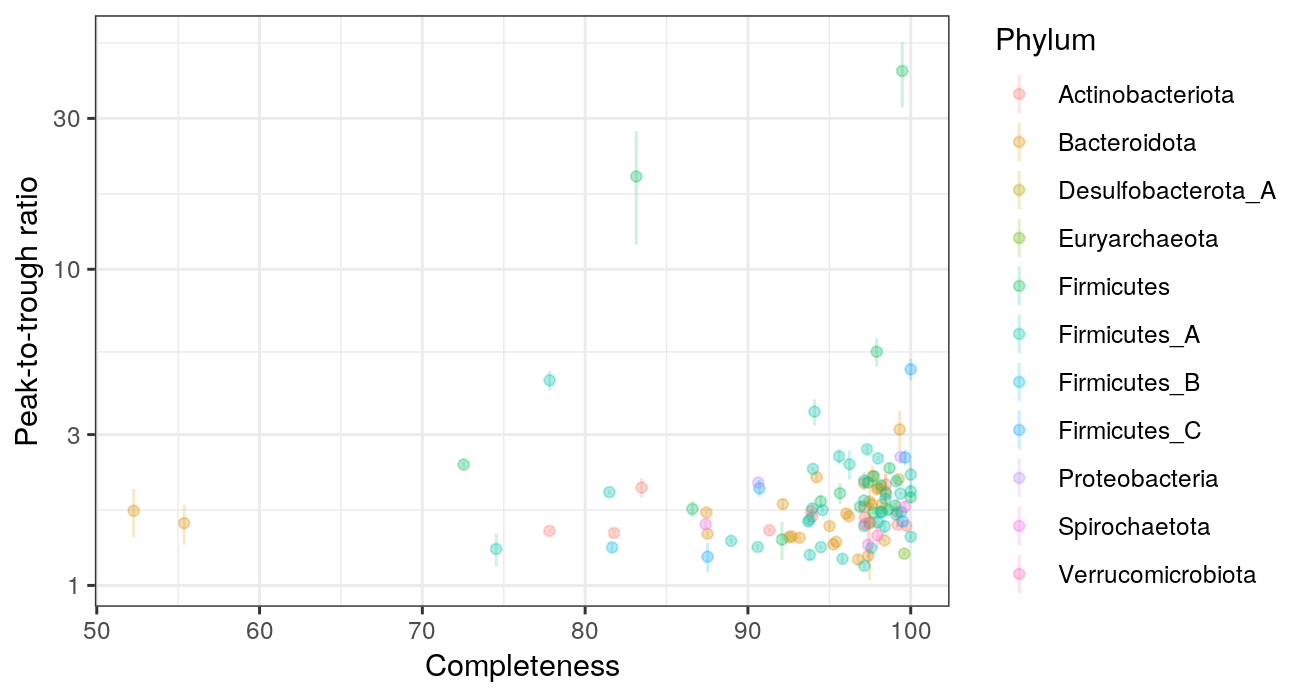

In [19]:
# outlier PTR values caused by low completeness?
p = demic_ptr_f %>%
    group_by(Phylum, taxon) %>%
    summarize(Completeness = first(Completeness),
              mean_PTR = mean(growth_rate),
              sd_PTR = sd(growth_rate),
              sderr_PTR = sd(growth_rate) / sqrt(n())) %>%
    ungroup() %>%
    mutate(Phylum = gsub('^p__', '', Phylum)) %>%
    ggplot(aes(Completeness, mean_PTR, color=Phylum)) +
    geom_linerange(aes(ymin=mean_PTR-sderr_PTR, 
                       ymax=mean_PTR+sderr_PTR),
                  alpha=0.2) +
    geom_point(alpha=0.3) +
    scale_y_log10() +
    labs(y='Peak-to-trough ratio') +
    theme_bw() 

dims(6.5, 3.5)
Plot(p)

# LLMGPS (10 mil reads) 

In [25]:
# number of samples with 10mil reads
n_paired_reads_cutoff = 1e7

MGnify_samp_f = MGnify_samp  %>%
    filter(Total.Sequences >= n_paired_reads_cutoff,
           biome_1 != 'Engineered')

MGnify_samp_f

Sample,Read1,Read2,Notes,C,LR,modelR,LRstar,diversity,Sample.y,⋯,analysis_id,raw_seq_count,instrument,study,paired_reads,n,rand_sample,category,bioproject_primary,bioproject_secundary
<chr>,<fct>,<fct>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,⋯,<fct>,<int>,<fct>,<fct>,<int>,<int>,<int>,<int>,<fct>,<fct>
ERS723591,/ebio/abt3_projects/databases_no-backup/MGnify/190900_dataset/LLMGQC/final/ERS723591/R1_final.fq.gz,/ebio/abt3_projects/databases_no-backup/MGnify/190900_dataset/LLMGQC/final/ERS723591/R2_final.fq.gz,NA,0.9475353,2001491181,0.9997791,1549349813,17.26604,ERS723591 | fastqc_per_sample | R1_final,⋯,MGYA00128605,46354787,Illumina HiSeq 2000,MGYS00001796,23177393,88,30,1,PRJEB9357,ERP010448
ERS723612,/ebio/abt3_projects/databases_no-backup/MGnify/190900_dataset/LLMGQC/final/ERS723612/R1_final.fq.gz,/ebio/abt3_projects/databases_no-backup/MGnify/190900_dataset/LLMGQC/final/ERS723612/R2_final.fq.gz,NA,0.9363293,1787464007,0.9997541,1476517886,17.34965,ERS723612 | fastqc_per_sample | R1_final,⋯,MGYA00128574,36717477,Illumina HiSeq 2000,MGYS00001796,18358738,88,30,1,PRJEB9357,ERP010448
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
ERS970222,/ebio/abt3_projects/databases_no-backup/MGnify/190900_dataset/LLMGQC/final/ERS970222/R1_final.fq.gz,/ebio/abt3_projects/databases_no-backup/MGnify/190900_dataset/LLMGQC/final/ERS970222/R2_final.fq.gz,NA,0.7149372,3072212568,0.9996071,44631146024,20.12179,ERS970222 | fastqc_per_sample | R1_final,⋯,MGYA00074751,68996017,Illumina HiSeq 2000,MGYS00001225,34498008,516,30,25,PRJEB11755,ERP013165
ERS970335,/ebio/abt3_projects/databases_no-backup/MGnify/190900_dataset/LLMGQC/final/ERS970335/R1_final.fq.gz,/ebio/abt3_projects/databases_no-backup/MGnify/190900_dataset/LLMGQC/final/ERS970335/R2_final.fq.gz,NA,0.5646210,3149904686,0.9996862,96409979631,21.29299,ERS970335 | fastqc_per_sample | R1_final,⋯,MGYA00074582,70443585,Illumina HiSeq 2000,MGYS00001225,35221792,516,30,25,PRJEB11755,ERP013165


File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/metagenome/multi-study/08_drep95_wGeorgAnimal/.figures/d7ca6455378f92c2078a5ce5a0534632.RDS 


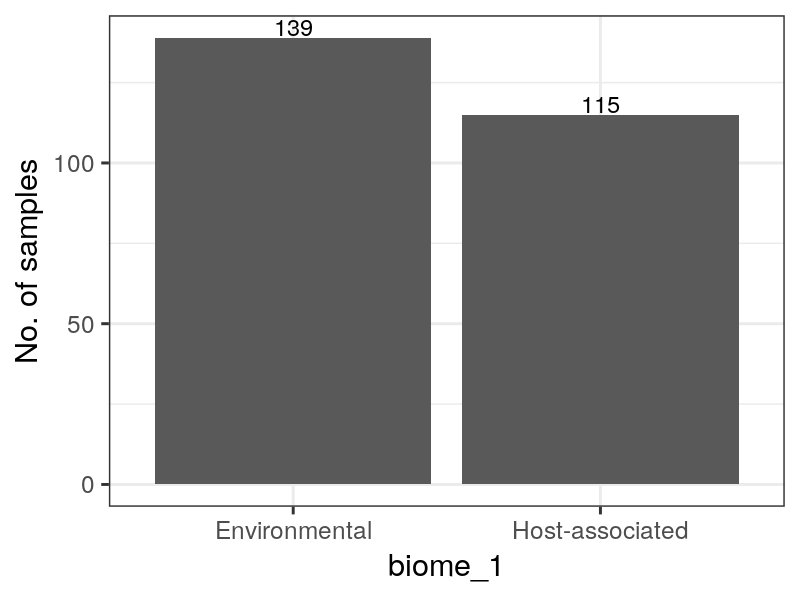

In [26]:
# plotting number of remaining samples
p = MGnify_samp_f %>%
    filter(Filename == 'R1_final.fq.gz') %>%
    dplyr::select(Sample, Total.Sequences, avg_sequence_length, bioproject_primary,
              environment_biome, environment_feature, environment_material,
              biome_0, biome_1, biome_2, biome_3, biome_4, biome_5) %>%
    group_by(biome_1) %>%
    summarize(n = n()) %>%
    ungroup() %>%
    ggplot(aes(biome_1, n, label=n)) +
    geom_bar(stat='identity', position='dodge') +
    geom_text(position=position_dodge(width=0.9), vjust=-0.1, size=3) +
    labs(y='No. of samples') +
    theme_bw() 

dims(4,3)
Plot(p)

File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/metagenome/multi-study/08_drep95_wGeorgAnimal/.figures/a309c6180d6e49c53680fb8061ba1e13.RDS 


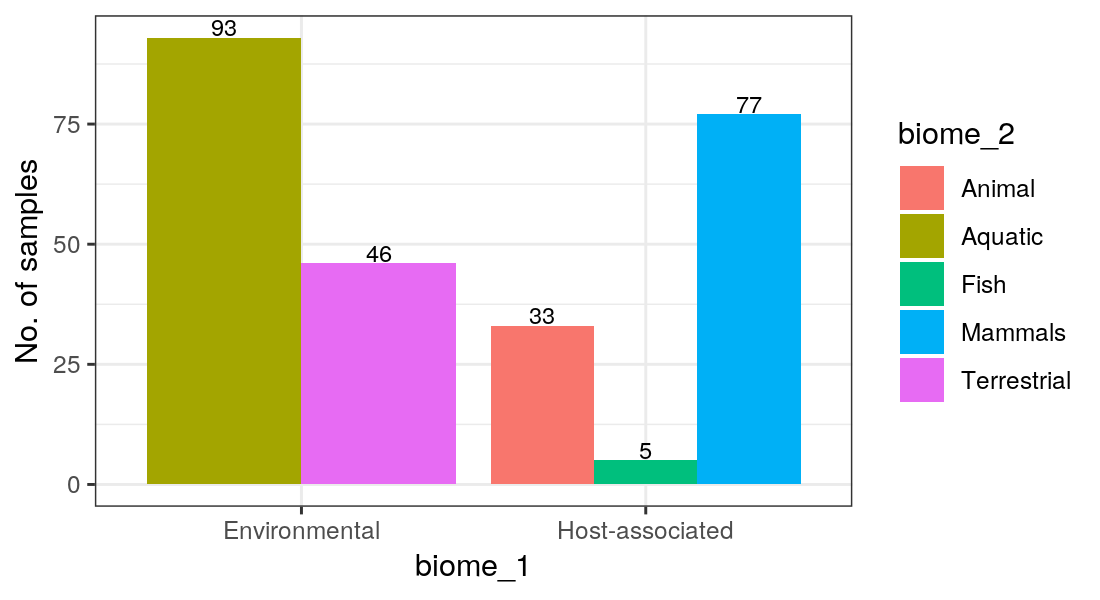

In [27]:
# plotting number of remaining samples
p = MGnify_samp_f %>%
    filter(Filename == 'R1_final.fq.gz') %>%
    dplyr::select(Sample, Total.Sequences, avg_sequence_length, bioproject_primary,
              environment_biome, environment_feature, environment_material,
              biome_0, biome_1, biome_2, biome_3, biome_4, biome_5) %>%
    group_by(biome_1, biome_2) %>%
    summarize(n = n()) %>%
    ungroup() %>%
    ggplot(aes(biome_1, n, fill=biome_2, label=n)) +
    geom_bar(stat='identity', position='dodge') +
    geom_text(position=position_dodge(width=0.9), vjust=-0.1, size=3) +
    labs(y='No. of samples') +
    theme_bw() 

dims(5.5,3)
Plot(p)

File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/metagenome/multi-study/08_drep95_wGeorgAnimal/.figures/8e3a665fe9621dd4ac522a0e9302c4e3.RDS 


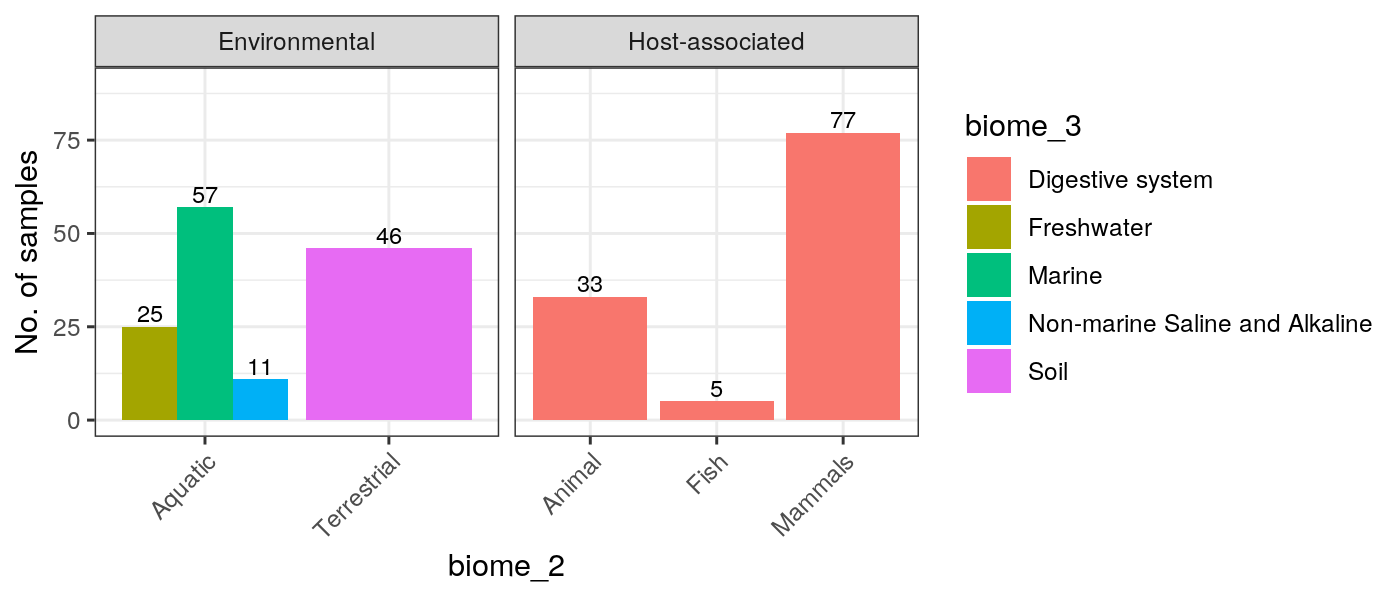

In [28]:
# plotting number of remaining samples
p = MGnify_samp_f %>%
    filter(Filename == 'R1_final.fq.gz') %>%
    dplyr::select(Sample, Total.Sequences, avg_sequence_length, bioproject_primary,
              environment_biome, environment_feature, environment_material,
              biome_0, biome_1, biome_2, biome_3, biome_4, biome_5) %>%
    group_by(biome_1, biome_2, biome_3) %>%
    summarize(n = n()) %>%
    ungroup() %>%
    ggplot(aes(biome_2, n, fill=biome_3, label=n)) +
    geom_bar(stat='identity', position='dodge') +
    geom_text(position=position_dodge(width=0.9), vjust=-0.25, size=3) +
    labs(y='No. of samples') +
    facet_wrap(~ biome_1, scales='free_x') +
    ylim(0, 90) +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=45, hjust=1)
    )

dims(7,3)
Plot(p)

## Writing samples file

In [68]:
samp_file = file.path(work_dir, 'samples_demic-10mil.txt')
MGnify_samp_f %>%
    write.table(file=samp_file, sep='\t', quote=FALSE, row.names=FALSE)
cat('File written:', samp_file)

File written: /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/MGnify-host-env/samples_demic-10mil.txt

## Config

In [69]:
# config
config_file =  file.path(work_dir, 'config_DEMIC-10mil.yaml')
cat_file(config_file)

#-- I/O --#
# table with sample --> read_file information
samples_file: /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/MGnify-host-env/samples_demic-10mil.txt

# table of reference genomes; not needed for all analyses (see README.md)
genomes_db: /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/MGnify-host-env/ref_genomes.txt

# output location
#output_dir: tests/output_amy_n8/
output_dir: /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/MGnify-host-env/


# read file path
# use "None" if full file path is included in the samples_file
read_file_path: None

#-- clades to analyze with strainphlan (ALL = all clades) --#
clades:
 - ALL
# - s__Methanobrevibacter_smithii
# - s__Faecalibacterium_prausnitzii
# - g__Blautia

#-- DB --#
# metaphlan marker databse
metaphlan2_db: /ebio/abt3_projects

## Run

```
(snakemake_dev) @ rick:/ebio/abt3_projects/Georg_animal_feces/bin/llmgps
screen -L -S llmgps-MGnify-DEMIC ./snakemake_sge.sh /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/MGnify-host-env/config_DEMIC-10mil.yaml cluster.json /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/MGnify-host-env/SGE_log 50
```

## Summary

In [74]:
demic_ptr_file = file.path(work_dir, 'demic_10mil', 'all_PTR.txt')
demic_ptr = read.delim(demic_ptr_file, sep='\t') %>%
    gather(sample, growth_rate, -X) %>%
    rename('taxon' = X)

demic_ptr$growth_rate %>% summary
demic_ptr 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   1.00    1.40    1.65    1.95    1.98   46.13  262808 

taxon,sample,growth_rate
<fct>,<chr>,<dbl>
R14__maxbin2_high_prob_015_contigs,DRS034400,NA
SAMEA104315435__metabat2_low_PE_011_contigs,DRS034400,NA
⋮,⋮,⋮
SAMEA3387478__metabat2_high_PE_043_contigs,SRS963627,NA
R24__metabat2_high_PE_033_contigs,SRS963627,NA


In [75]:
# number of taxa with any growth rates
demic_ptr_f = demic_ptr %>%
    filter(!is.na(growth_rate))

demic_ptr %>% .$taxon %>% unique %>% length %>% print
demic_ptr_f %>% .$taxon %>% unique %>% length %>% print

[1] 1181
[1] 183


In [76]:
# adding sample metadata
demic_ptr_f = demic_ptr_f %>%
    inner_join(MGnify_meta, c('sample'='Sample')) 

demic_ptr_f

Warning message:
“Column `sample`/`Sample` joining character vector and factor, coercing into character vector”


taxon,sample,growth_rate,C,LR,modelR,LRstar,diversity,Sample.y,Filename,⋯,analysis_id,raw_seq_count,instrument,study,paired_reads,n,rand_sample,category,bioproject_primary,bioproject_secundary
<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,⋯,<fct>,<int>,<fct>,<fct>,<int>,<int>,<int>,<int>,<fct>,<fct>
X328_Prussian_Carp__metabat2_low_PE_002_contigs,ERS1030534,1.8799,0.5365439,1180310938,0.9994705,66615817354,20.35606,ERS1030534 | fastqc_per_sample | R1_final,R1_final.fq.gz,⋯,MGYA00021862,23163525,Illumina HiSeq 1500,MGYS00000599,11581762,10,10,11,PRJEB12327,ERP013793
X328_Prussian_Carp__metabat2_low_PE_002_contigs,ERS1030535,1.6208,0.5523007,1081733012,0.9991348,67205153691,20.08911,ERS1030535 | fastqc_per_sample | R1_final,R1_final.fq.gz,⋯,MGYA00021861,21253629,Illumina HiSeq 1500,MGYS00000599,10626814,10,10,11,PRJEB12327,ERP013793
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
SAMEA3663015__metabat2_low_PE_008_contigs,ERS970416,1.3190,0.5059896,1263891232,0.9995317,81080980322,20.63296,ERS970416 | fastqc_per_sample | R1_final,R1_final.fq.gz,⋯,MGYA00074420,28391725,Illumina HiSeq 2000,MGYS00001225,14195862,516,30,25,PRJEB11755,ERP013165
SAMEA3663248__metabat2_high_PE_009_contigs,ERS970416,1.1388,0.5059896,1263891232,0.9995317,81080980322,20.63296,ERS970416 | fastqc_per_sample | R1_final,R1_final.fq.gz,⋯,MGYA00074420,28391725,Illumina HiSeq 2000,MGYS00001225,14195862,516,30,25,PRJEB11755,ERP013165


In [77]:
# adding MAG metadata
demic_ptr_f = demic_ptr_f %>%
    inner_join(MAG_meta %>% mutate(binID = gsub('\\.', '_', binID)), 
               c('taxon'='binID')) 
demic_ptr_f

Warning message:
“Column `taxon`/`binID` joining factor and character vector, coercing into character vector”


taxon,sample,growth_rate,C,LR,modelR,LRstar,diversity,Sample.y,Filename,⋯,closest_placement_taxonomy,closest_placement_ani,closest_placement_af,pplacer_taxonomy,classification_method,note,aa_percent,translation_table,red_value,warnings
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<int>,<fct>,<fct>
X328_Prussian_Carp__metabat2_low_PE_002_contigs,ERS1030534,1.8799,0.5365439,1180310938,0.9994705,66615817354,20.35606,ERS1030534 | fastqc_per_sample | R1_final,R1_final.fq.gz,⋯,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Moraxellaceae;g__Acinetobacter;s__Acinetobacter johnsonii,97.05,0.97,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Moraxellaceae;g__Acinetobacter;s__,ANI/Placement,topological placement and ANI have congruent species assignments,91.73,11,N/A,N/A
X328_Prussian_Carp__metabat2_low_PE_002_contigs,ERS1030535,1.6208,0.5523007,1081733012,0.9991348,67205153691,20.08911,ERS1030535 | fastqc_per_sample | R1_final,R1_final.fq.gz,⋯,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Moraxellaceae;g__Acinetobacter;s__Acinetobacter johnsonii,97.05,0.97,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Moraxellaceae;g__Acinetobacter;s__,ANI/Placement,topological placement and ANI have congruent species assignments,91.73,11,N/A,N/A
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
SAMEA3663015__metabat2_low_PE_008_contigs,ERS970416,1.3190,0.5059896,1263891232,0.9995317,81080980322,20.63296,ERS970416 | fastqc_per_sample | R1_final,R1_final.fq.gz,⋯,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__P3;g__UBA3388;s__UBA3388 sp002358835,78.2,0.28,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__P3;g__UBA3388;s__,Placement,taxonomic classification fully defined by topology,98.35,11,0.948791786799,N/A
SAMEA3663248__metabat2_high_PE_009_contigs,ERS970416,1.1388,0.5059896,1263891232,0.9995317,81080980322,20.63296,ERS970416 | fastqc_per_sample | R1_final,R1_final.fq.gz,⋯,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__UBA1712;s__UBA1712 sp002317245,78.77,0.25,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__UBA1712;s__,Placement,taxonomic classification fully defined by topology,83.81,11,0.947191113438,N/A


### Distribution among samples

In [78]:
demic_ptr_f$biome_1 %>% summary

demic_ptr_f$biome_2 %>% summary

demic_ptr_f$biome_3 %>% summary

Engineered   Environmental Host-associated 
              0               4            2913

Animal     Aquatic        Fish     Mammals Terrestrial  Wastewater 
        814           4           0        2099           0           0

Digestive system                     Freshwater 
                          2913                              4 
                        Marine Non-marine Saline and Alkaline 
                             0                              0 
              Nutrient removal                           Soil 
                             0                              0

Number of samples per MAG with non-NA values:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   2.00    8.00   15.00   15.94   24.00   49.00 

Number of MAGs: 183 
File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/metagenome/multi-study/08_drep95_wGeorgAnimal/.figures/3844172c7bdecf1b8dd026f71231273c.RDS 


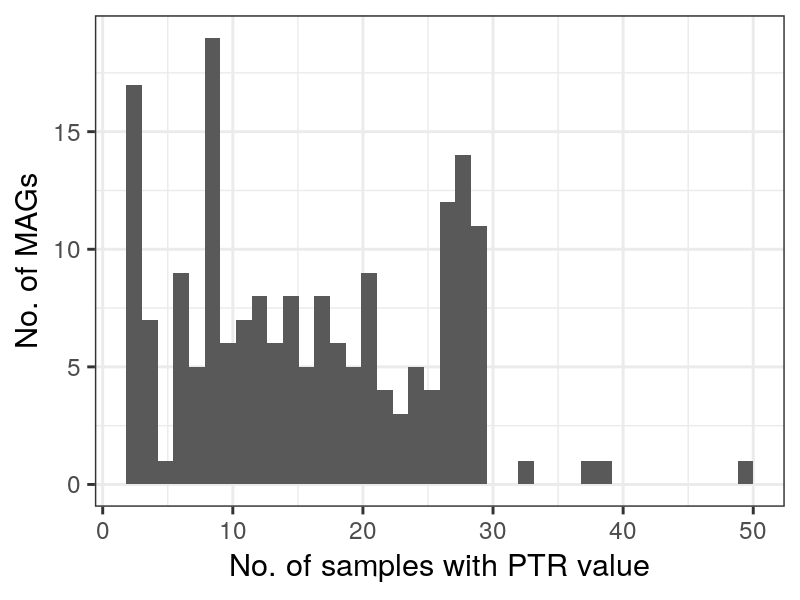

In [79]:
demic_ptr_f_s = demic_ptr_f %>%
    group_by(taxon) %>%
    summarize(n_samples = n()) %>%
    ungroup() 

cat('Number of samples per MAG with non-NA values:\n')
demic_ptr_f_s %>% .$n_samples %>% summary %>% print
cat('\n')

cat('Number of MAGs:', demic_ptr_f_s %>% .$taxon %>% unique %>% length, '\n')

p = demic_ptr_f_s %>%
    ggplot(aes(n_samples)) +
    geom_histogram(bins=40) +
    labs(x='No. of samples with PTR value', y='No. of MAGs') +
    theme_bw()

dims(4,3)
Plot(p)

Number of MAGs w/ env PTR values: 1 


Domain,Phylum,Class,Order,Family,Genus
<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Pseudomonadales,f__Moraxellaceae,g__Acinetobacter


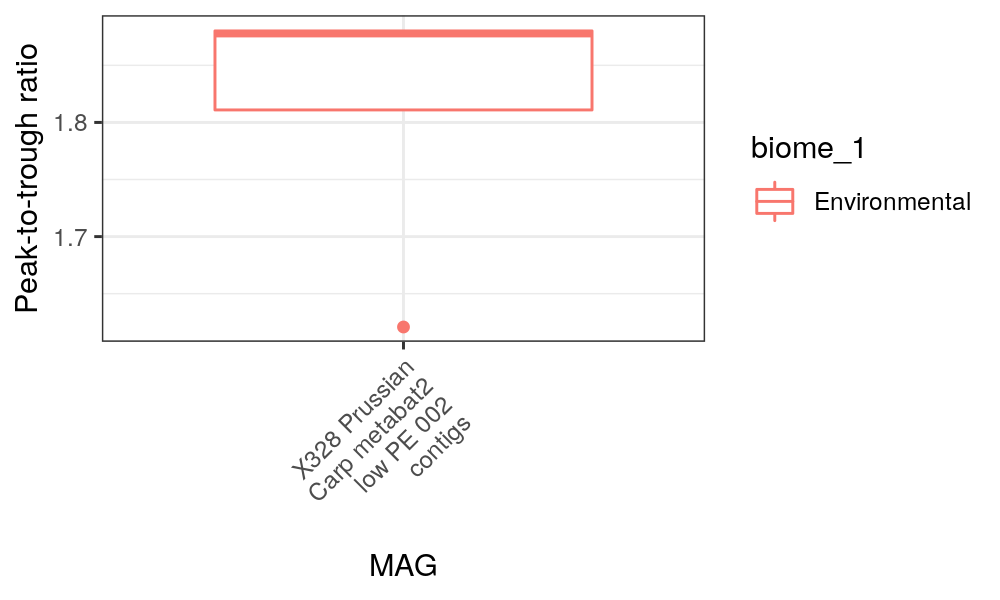

In [80]:
# MAGs found in env.
MAGs_in_env = demic_ptr_f %>%
    filter(biome_1 == 'Environmental') %>%
    .$taxon %>% unique

cat('Number of MAGs w/ env PTR values:', MAGs_in_env  %>% length, '\n')

demic_ptr_f %>%
    filter(taxon %in% MAGs_in_env) %>%
    distinct(Domain, Phylum, Class, Order, Family, Genus)

p = demic_ptr_f %>%
    filter(taxon %in% MAGs_in_env) %>%
    mutate(taxon = gsub('_+', '\n', taxon),
           taxon = stringr::str_wrap(taxon, 16)) %>%
    ggplot(aes(taxon, growth_rate, color=biome_1)) +
    geom_boxplot() +
    labs(x='MAG', y='Peak-to-trough ratio') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=45, hjust=1)
    )

dims(5, 3)
plot(p)

In [105]:
demic_ptr_f_s = demic_ptr_f %>%
    group_by(taxon) %>%
    mutate(n_samples = n()) %>%
    ungroup() %>%
    filter(n_samples >= 3) %>%
    group_by(Phylum) %>%
    mutate(mean_n_samples = mean(n_samples),
           n_taxa = n_distinct(taxon)) %>%
    ungroup() %>%
    mutate(Phylum = gsub('^p__', '', Phylum)) %>%
    group_by(taxon) %>%
    summarize(growth_rate = mean(growth_rate),
              mean_n_samples = first(mean_n_samples),
              Phylum = first(Phylum),
              n_taxa = first(n_taxa)) %>%
    ungroup() 

demic_ptr_f_s 

taxon,growth_rate,mean_n_samples,Phylum,n_taxa
<chr>,<dbl>,<dbl>,<chr>,<int>
Ash_p2__metabat2_high_PE_017_contigs,1.52790,20.18519,Actinobacteriota,16
Avalanche_p1__metabat2_low_PE_018_contigs,1.77585,21.36145,Firmicutes_A,68
⋮,⋮,⋮,⋮,⋮
X355_Hoffmanns_Two_toed_Sloth__metabat2_high_PE_021_contigs,1.6803,3.00000,Verrucomicrobiota,1
X87_Garden_Dormouse__metabat2_low_PE_004_contigs,1.4802,23.15652,Firmicutes,22


File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/metagenome/multi-study/08_drep95_wGeorgAnimal/.figures/f4dc821544289b01f889cbf0f0c6ab30.RDS 


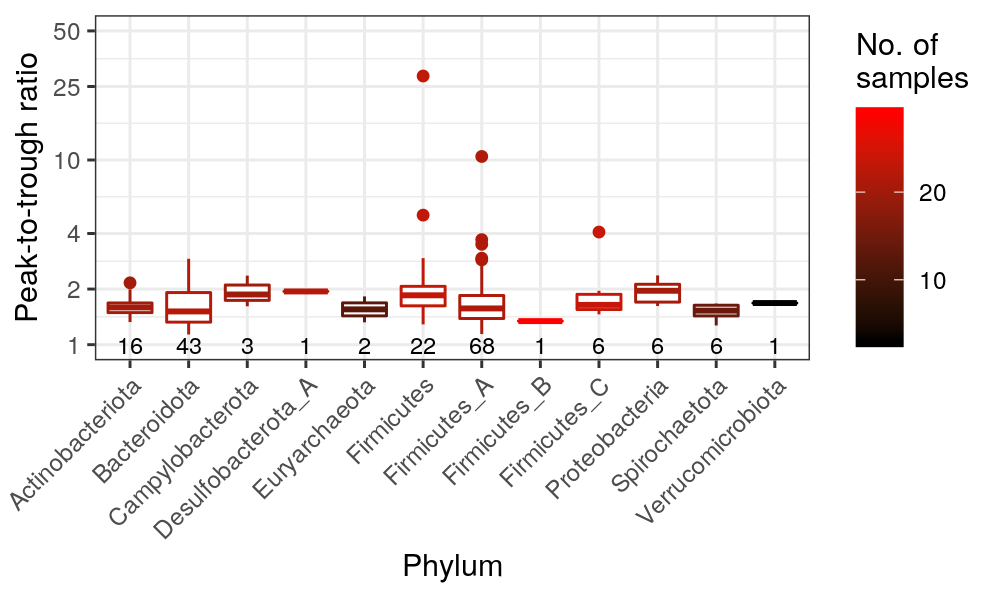

In [114]:
# PTR values for each MAG (grouped by phylum); only MAGs with >=3 PTR values shown
brks = c(1,2,4,10,25,50)
p = demic_ptr_f_s %>%
    ggplot(aes(Phylum, growth_rate, color=mean_n_samples)) +
    geom_boxplot() +
    geom_text(aes(label=n_taxa, y=1), color='black', size=3,
              data=demic_ptr_f_s %>% distinct(n_taxa, Phylum)) +
    scale_color_continuous('No. of\nsamples', low='black', high='red') +
    scale_y_log10(breaks=brks, labels=brks, limits=c(1,50)) +
    labs(y='Peak-to-trough ratio') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=45, hjust=1)
    )

dims(5, 3)
Plot(p)

File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/metagenome/multi-study/08_drep95_wGeorgAnimal/.figures/665d4601bc859d9e643ea271f572e084.RDS 


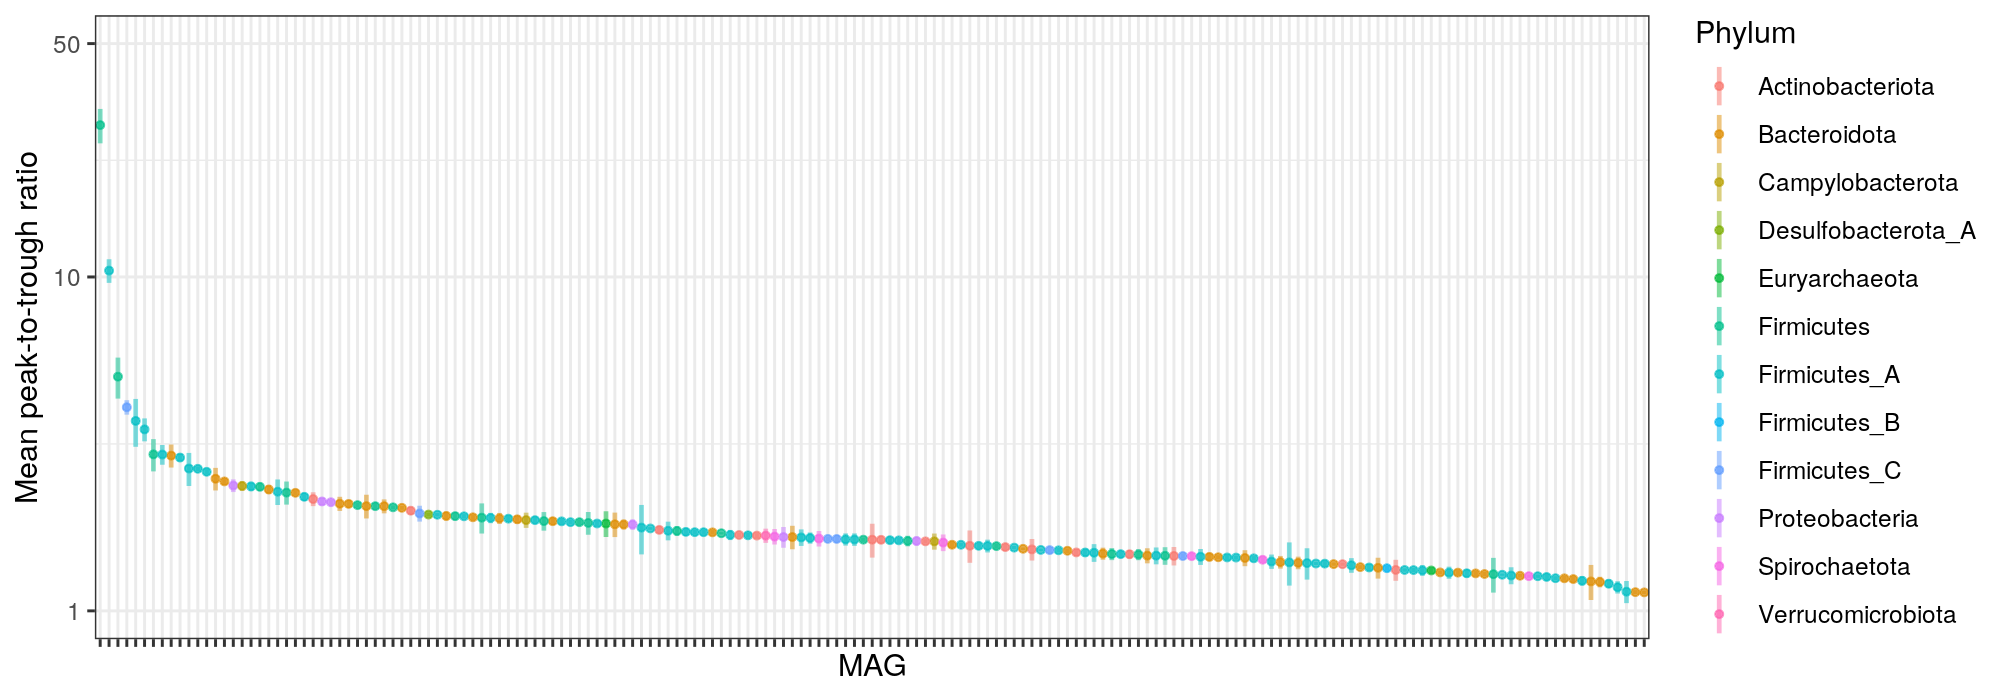

In [37]:
# PTR values for each MAG (grouped by phylum); only MAGs with >=3 PTR values shown
p = demic_ptr_f %>%
    group_by(taxon) %>%
    mutate(n_samples = n()) %>%
    ungroup() %>%
    filter(n_samples >= 3) %>%
    group_by(taxon) %>%
    summarize(mean_growth_rate = mean(growth_rate),
              sderr_growth_rate = sd(growth_rate) / sqrt(n()),
              Phylum = first(Phylum)) %>%
    ungroup() %>%
    mutate(Phylum = gsub('^p__', '', Phylum),
           taxon = taxon %>% reorder(-mean_growth_rate)) %>%
    ggplot(aes(taxon, mean_growth_rate, color=Phylum)) +
    geom_linerange(aes(ymin=mean_growth_rate-sderr_growth_rate,
                       ymax=mean_growth_rate+sderr_growth_rate),
                  alpha=0.5, size=0.8) +
    geom_point(alpha=0.7, size=1) +
    scale_y_log10(breaks=c(1,10,50), labels=c(1,10,50), limits=c(1,50)) +
    labs(x='MAG', y='Mean peak-to-trough ratio') +
    theme_bw() +
    theme(
        axis.text.x = element_blank() 
    )

dims(10, 3.5)
Plot(p)

File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/metagenome/multi-study/08_drep95_wGeorgAnimal/.figures/022a9ef070aa3784cb0ecc5e40451468.RDS 


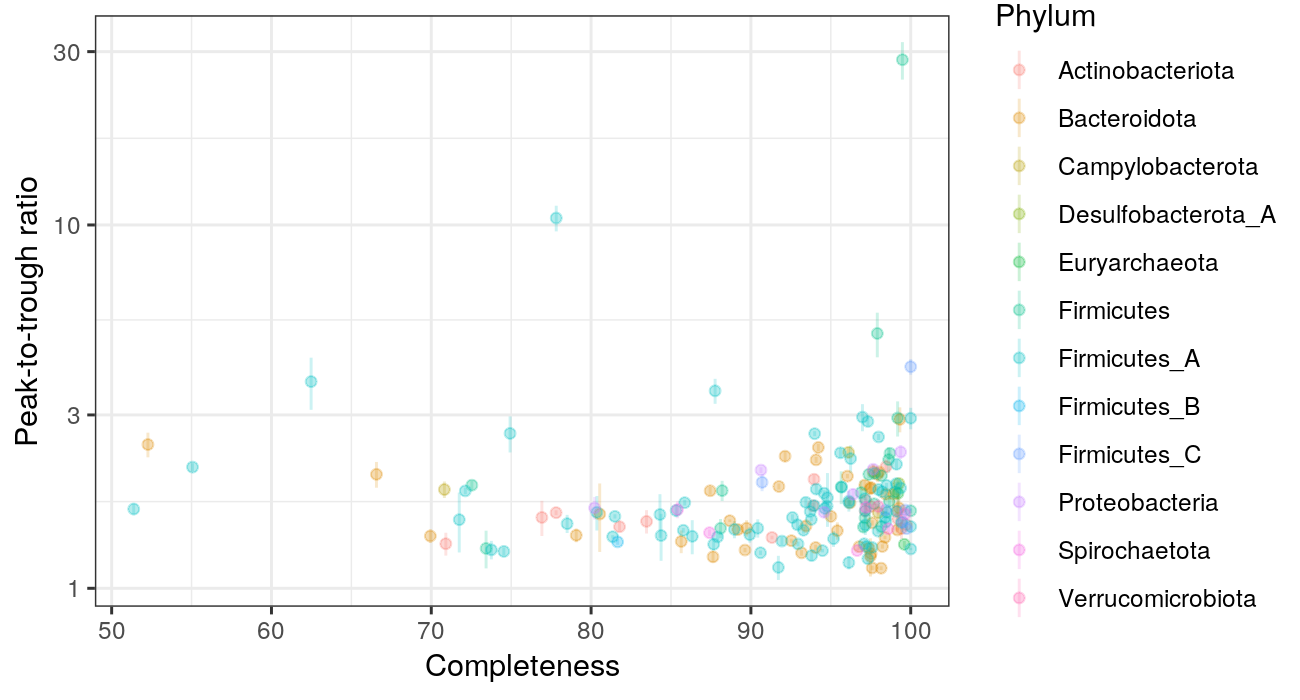

In [38]:
# outlier PTR values caused by low completeness?
p = demic_ptr_f %>%
    group_by(Phylum, taxon) %>%
    summarize(Completeness = first(Completeness),
              mean_PTR = mean(growth_rate),
              sd_PTR = sd(growth_rate),
              sderr_PTR = sd(growth_rate) / sqrt(n())) %>%
    ungroup() %>%
    mutate(Phylum = gsub('^p__', '', Phylum)) %>%
    ggplot(aes(Completeness, mean_PTR, color=Phylum)) +
    geom_linerange(aes(ymin=mean_PTR-sderr_PTR, 
                       ymax=mean_PTR+sderr_PTR),
                  alpha=0.2) +
    geom_point(alpha=0.3) +
    scale_y_log10() +
    labs(y='Peak-to-trough ratio') +
    theme_bw() 

dims(6.5, 3.5)
Plot(p)

# LLMGPS (20 mil reads)

In [51]:
# number of samples with 20mil reads
n_paired_reads_cutoff = 2e7

MGnify_samp_f = MGnify_samp  %>%
    filter(Total.Sequences >= n_paired_reads_cutoff,
           biome_1 != 'Engineered')

MGnify_samp_f

Sample,Read1,Read2,Notes,C,LR,modelR,LRstar,diversity,Sample.y,⋯,analysis_id,raw_seq_count,instrument,study,paired_reads,n,rand_sample,category,bioproject_primary,bioproject_secundary
<chr>,<fct>,<fct>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,⋯,<fct>,<int>,<fct>,<fct>,<int>,<int>,<int>,<int>,<fct>,<fct>
ERS723591,/ebio/abt3_projects/databases_no-backup/MGnify/190900_dataset/LLMGQC/final/ERS723591/R1_final.fq.gz,/ebio/abt3_projects/databases_no-backup/MGnify/190900_dataset/LLMGQC/final/ERS723591/R2_final.fq.gz,NA,0.9475353,2001491181,0.9997791,1549349813,17.26604,ERS723591 | fastqc_per_sample | R1_final,⋯,MGYA00128605,46354787,Illumina HiSeq 2000,MGYS00001796,23177393,88,30,1,PRJEB9357,ERP010448
ERS723614,/ebio/abt3_projects/databases_no-backup/MGnify/190900_dataset/LLMGQC/final/ERS723614/R1_final.fq.gz,/ebio/abt3_projects/databases_no-backup/MGnify/190900_dataset/LLMGQC/final/ERS723614/R2_final.fq.gz,NA,0.9397320,2501692285,0.9997521,2067111892,17.57925,ERS723614 | fastqc_per_sample | R1_final,⋯,MGYA00128565,52410749,Illumina HiSeq 2000,MGYS00001796,26205374,88,30,1,PRJEB9357,ERP010448
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
ERS970222,/ebio/abt3_projects/databases_no-backup/MGnify/190900_dataset/LLMGQC/final/ERS970222/R1_final.fq.gz,/ebio/abt3_projects/databases_no-backup/MGnify/190900_dataset/LLMGQC/final/ERS970222/R2_final.fq.gz,NA,0.7149372,3072212568,0.9996071,44631146024,20.12179,ERS970222 | fastqc_per_sample | R1_final,⋯,MGYA00074751,68996017,Illumina HiSeq 2000,MGYS00001225,34498008,516,30,25,PRJEB11755,ERP013165
ERS970335,/ebio/abt3_projects/databases_no-backup/MGnify/190900_dataset/LLMGQC/final/ERS970335/R1_final.fq.gz,/ebio/abt3_projects/databases_no-backup/MGnify/190900_dataset/LLMGQC/final/ERS970335/R2_final.fq.gz,NA,0.5646210,3149904686,0.9996862,96409979631,21.29299,ERS970335 | fastqc_per_sample | R1_final,⋯,MGYA00074582,70443585,Illumina HiSeq 2000,MGYS00001225,35221792,516,30,25,PRJEB11755,ERP013165


File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/metagenome/multi-study/08_drep95_wGeorgAnimal/.figures/df546bc77e64293e018bd16ef6f2a575.RDS 


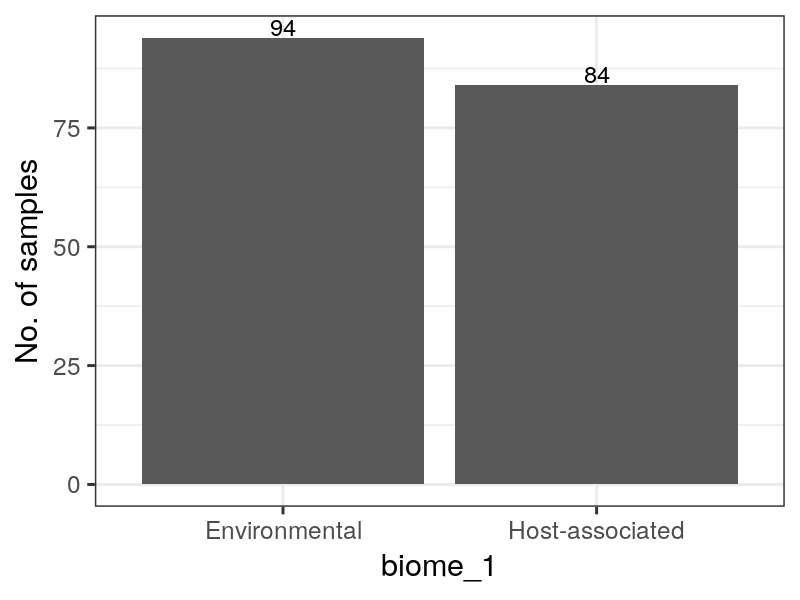

In [52]:
# plotting number of remaining samples
p = MGnify_samp_f %>%
    filter(Filename == 'R1_final.fq.gz') %>%
    dplyr::select(Sample, Total.Sequences, avg_sequence_length, bioproject_primary,
              environment_biome, environment_feature, environment_material,
              biome_0, biome_1, biome_2, biome_3, biome_4, biome_5) %>%
    group_by(biome_1) %>%
    summarize(n = n()) %>%
    ungroup() %>%
    ggplot(aes(biome_1, n, label=n)) +
    geom_bar(stat='identity', position='dodge') +
    geom_text(position=position_dodge(width=0.9), vjust=-0.1, size=3) +
    labs(y='No. of samples') +
    theme_bw() 

dims(4,3)
Plot(p)

File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/metagenome/multi-study/08_drep95_wGeorgAnimal/.figures/2219a0859624a835f2b47d386159ef8a.RDS 


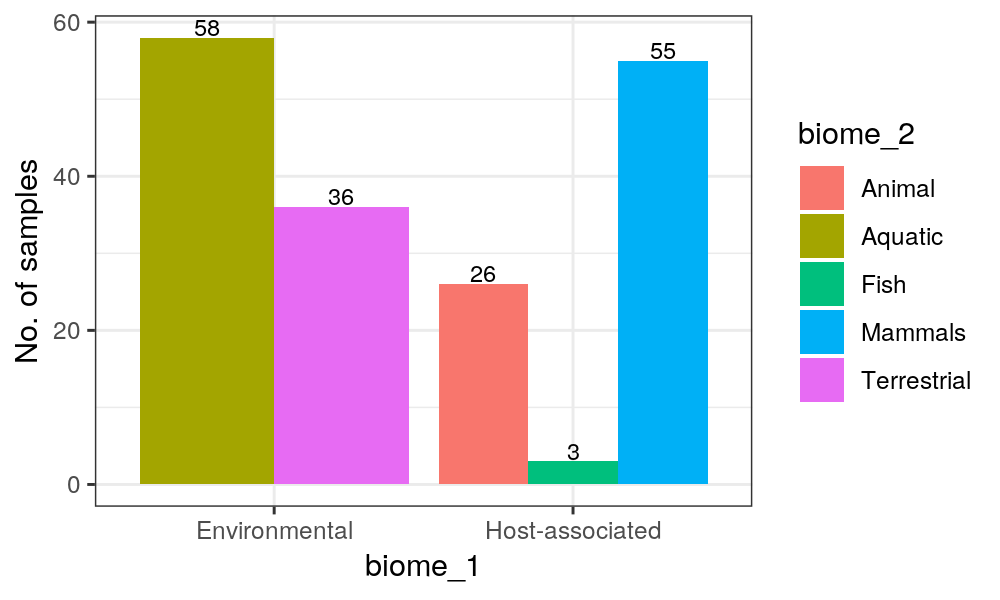

In [53]:
# plotting number of remaining samples
p = MGnify_samp_f %>%
    filter(Filename == 'R1_final.fq.gz') %>%
    dplyr::select(Sample, Total.Sequences, avg_sequence_length, bioproject_primary,
              environment_biome, environment_feature, environment_material,
              biome_0, biome_1, biome_2, biome_3, biome_4, biome_5) %>%
    group_by(biome_1, biome_2) %>%
    summarize(n = n()) %>%
    ungroup() %>%
    ggplot(aes(biome_1, n, fill=biome_2, label=n)) +
    geom_bar(stat='identity', position='dodge') +
    geom_text(position=position_dodge(width=0.9), vjust=-0.1, size=3) +
    labs(y='No. of samples') +
    theme_bw() 

dims(5,3)
Plot(p)

File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/metagenome/multi-study/08_drep95_wGeorgAnimal/.figures/92cdc81c4d47d84e88a6fd31a667a814.RDS 


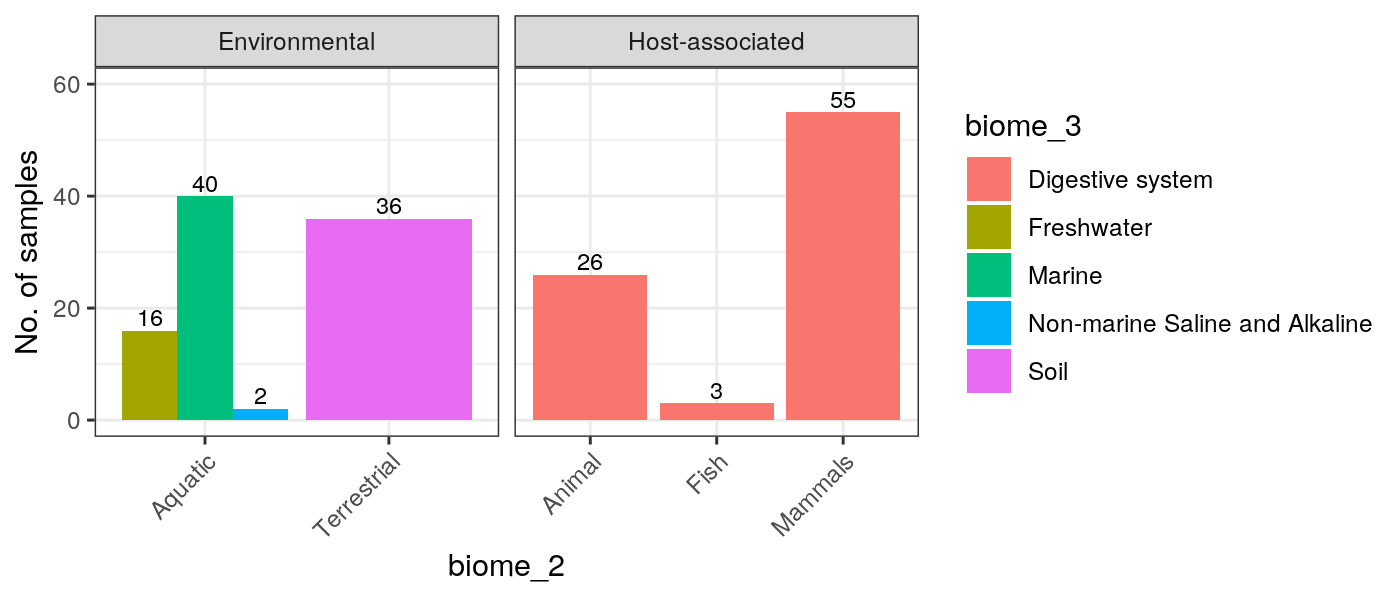

In [54]:
# plotting number of remaining samples
p = MGnify_samp_f %>%
    filter(Filename == 'R1_final.fq.gz') %>%
    dplyr::select(Sample, Total.Sequences, avg_sequence_length, bioproject_primary,
              environment_biome, environment_feature, environment_material,
              biome_0, biome_1, biome_2, biome_3, biome_4, biome_5) %>%
    group_by(biome_1, biome_2, biome_3) %>%
    summarize(n = n()) %>%
    ungroup() %>%
    ggplot(aes(biome_2, n, fill=biome_3, label=n)) +
    geom_bar(stat='identity', position='dodge') +
    geom_text(position=position_dodge(width=0.9), vjust=-0.25, size=3) +
    labs(y='No. of samples') +
    facet_wrap(~ biome_1, scales='free_x') +
    ylim(0, 60) +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=45, hjust=1)
    )

dims(7,3)
Plot(p)

## Writing samples table

In [181]:
samp_file = file.path(work_dir, 'samples_demic-20mil.txt')
MGnify_samp_f %>%
    write.table(file=samp_file, sep='\t', quote=FALSE, row.names=FALSE)
cat('File written:', samp_file)

File written: /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/MGnify-host-env/samples_demic-20mil.txt

## Config

In [183]:
# config
config_file =  file.path(work_dir, 'config_DEMIC-20mil.yaml')
cat_file(config_file)

#-- I/O --#
# table with sample --> read_file information
samples_file: /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/MGnify-host-env/samples_demic-10mil.txt

# table of reference genomes; not needed for all analyses (see README.md)
genomes_db: /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/MGnify-host-env/ref_genomes.txt

# output location
#output_dir: tests/output_amy_n8/
output_dir: /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/MGnify-host-env/


# read file path
# use "None" if full file path is included in the samples_file
read_file_path: None

#-- clades to analyze with strainphlan (ALL = all clades) --#
clades:
 - ALL
# - s__Methanobrevibacter_smithii
# - s__Faecalibacterium_prausnitzii
# - g__Blautia

#-- DB --#
# metaphlan marker databse
metaphlan2_db: /ebio/abt3_projects

### Run

```
(snakemake_dev) @ rick:/ebio/abt3_projects/Georg_animal_feces/bin/llmgps
screen -L -S llmgps-MGnify-DEMIC ./snakemake_sge.sh /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/MGnify-host-env/config_DEMIC-20mil.yaml cluster.json /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.95/MGnify-host-env/SGE_log 50
```

## Summary

In [63]:
demic_ptr_file = file.path(work_dir, 'demic_20mil', 'all_PTR.txt')
demic_ptr = read.delim(demic_ptr_file, sep='\t') %>%
    gather(sample, growth_rate, -X) %>%
    rename('taxon' = X)

demic_ptr$growth_rate %>% summary
demic_ptr 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   1.01    1.40    1.64    1.90    2.02   36.75  287064 

taxon,sample,growth_rate
<fct>,<chr>,<dbl>
Cebus_capucinus_imitator_PRJNA485217_SSR024__metabat2_low_PE_009_contigs,DRS034400,NA
SAMEA104315425__metabat2_high_PE_033_contigs,DRS034400,NA
⋮,⋮,⋮
R20__maxbin2_high_prob_036_contigs,SRS963627,NA
R06__maxbin2_low_prob_015_contigs,SRS963627,NA


In [64]:
# number of taxa with any growth rates
demic_ptr_f = demic_ptr %>%
    filter(!is.na(growth_rate))

demic_ptr %>% .$taxon %>% unique %>% length %>% print
demic_ptr_f %>% .$taxon %>% unique %>% length %>% print

[1] 1219
[1] 268


In [65]:
# adding sample metadata
demic_ptr_f = demic_ptr_f %>%
    inner_join(MGnify_meta, c('sample'='Sample')) 

demic_ptr_f

Warning message:
“Column `sample`/`Sample` joining character vector and factor, coercing into character vector”


taxon,sample,growth_rate,C,LR,modelR,LRstar,diversity,Sample.y,Filename,⋯,analysis_id,raw_seq_count,instrument,study,paired_reads,n,rand_sample,category,bioproject_primary,bioproject_secundary
<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,⋯,<fct>,<int>,<fct>,<fct>,<int>,<int>,<int>,<int>,<fct>,<fct>
X328_Prussian_Carp__metabat2_low_PE_002_contigs,ERS1030534,1.8230,0.5365439,1180310938,0.9994705,66615817354,20.35606,ERS1030534 | fastqc_per_sample | R1_final,R1_final.fq.gz,⋯,MGYA00021862,23163525,Illumina HiSeq 1500,MGYS00000599,11581762,10,10,11,PRJEB12327,ERP013793
X328_Prussian_Carp__metabat2_low_PE_002_contigs,ERS1030535,1.4749,0.5523007,1081733012,0.9991348,67205153691,20.08911,ERS1030535 | fastqc_per_sample | R1_final,R1_final.fq.gz,⋯,MGYA00021861,21253629,Illumina HiSeq 1500,MGYS00000599,10626814,10,10,11,PRJEB12327,ERP013793
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
SAMEA3663230__metabat2_low_PE_017_contigs,ERS970416,2.0600,0.5059896,1263891232,0.9995317,81080980322,20.63296,ERS970416 | fastqc_per_sample | R1_final,R1_final.fq.gz,⋯,MGYA00074420,28391725,Illumina HiSeq 2000,MGYS00001225,14195862,516,30,25,PRJEB11755,ERP013165
SAMEA3663036__metabat2_high_PE_015_contigs,ERS970416,1.7971,0.5059896,1263891232,0.9995317,81080980322,20.63296,ERS970416 | fastqc_per_sample | R1_final,R1_final.fq.gz,⋯,MGYA00074420,28391725,Illumina HiSeq 2000,MGYS00001225,14195862,516,30,25,PRJEB11755,ERP013165


In [66]:
# adding MAG metadata
demic_ptr_f = demic_ptr_f %>%
    inner_join(MAG_meta %>% mutate(binID = gsub('\\.', '_', binID)), 
               c('taxon'='binID')) 
demic_ptr_f

Warning message:
“Column `taxon`/`binID` joining factor and character vector, coercing into character vector”


taxon,sample,growth_rate,C,LR,modelR,LRstar,diversity,Sample.y,Filename,⋯,closest_placement_taxonomy,closest_placement_ani,closest_placement_af,pplacer_taxonomy,classification_method,note,aa_percent,translation_table,red_value,warnings
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<int>,<fct>,<fct>
X328_Prussian_Carp__metabat2_low_PE_002_contigs,ERS1030534,1.8230,0.5365439,1180310938,0.9994705,66615817354,20.35606,ERS1030534 | fastqc_per_sample | R1_final,R1_final.fq.gz,⋯,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Moraxellaceae;g__Acinetobacter;s__Acinetobacter johnsonii,97.05,0.97,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Moraxellaceae;g__Acinetobacter;s__,ANI/Placement,topological placement and ANI have congruent species assignments,91.73,11,N/A,N/A
X328_Prussian_Carp__metabat2_low_PE_002_contigs,ERS1030535,1.4749,0.5523007,1081733012,0.9991348,67205153691,20.08911,ERS1030535 | fastqc_per_sample | R1_final,R1_final.fq.gz,⋯,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Moraxellaceae;g__Acinetobacter;s__Acinetobacter johnsonii,97.05,0.97,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Moraxellaceae;g__Acinetobacter;s__,ANI/Placement,topological placement and ANI have congruent species assignments,91.73,11,N/A,N/A
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
SAMEA3663230__metabat2_low_PE_017_contigs,ERS970416,2.0600,0.5059896,1263891232,0.9995317,81080980322,20.63296,ERS970416 | fastqc_per_sample | R1_final,R1_final.fq.gz,⋯,N/A,N/A,N/A,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Oscillospirales;f__Oscillospiraceae;g__CAG-110;s__,Placement,taxonomic classification fully defined by topology,97.08,11,0.948366986941,N/A
SAMEA3663036__metabat2_high_PE_015_contigs,ERS970416,1.7971,0.5059896,1263891232,0.9995317,81080980322,20.63296,ERS970416 | fastqc_per_sample | R1_final,R1_final.fq.gz,⋯,N/A,N/A,N/A,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Paludibacteraceae;g__RF16;s__,Placement,taxonomic classification fully defined by topology,66.27,11,0.961745816195,N/A


### Distribution among samples

In [67]:
demic_ptr_f$biome_1 %>% summary

demic_ptr_f$biome_2 %>% summary

demic_ptr_f$biome_3 %>% summary

Engineered   Environmental Host-associated 
              0               4            4273

Animal     Aquatic        Fish     Mammals Terrestrial  Wastewater 
       1397           4           0        2876           0           0

Digestive system                     Freshwater 
                          4273                              4 
                        Marine Non-marine Saline and Alkaline 
                             0                              0 
              Nutrient removal                           Soil 
                             0                              0

Number of samples per MAG with non-NA values:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   2.00    8.00   14.50   15.96   24.00   51.00 

Number of MAGs: 268 
File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/metagenome/multi-study/08_drep95_wGeorgAnimal/.figures/527276b139b8976d5f09e4f90a1dd1aa.RDS 


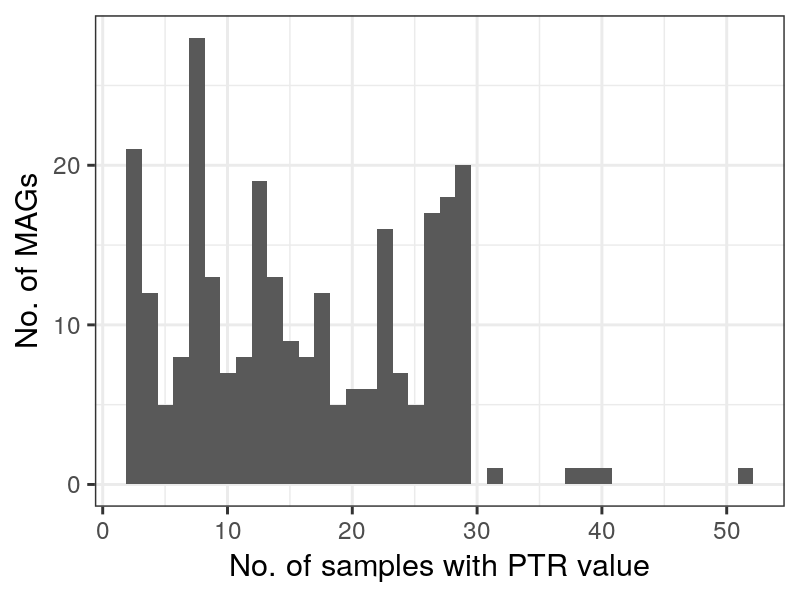

In [68]:
demic_ptr_f_s = demic_ptr_f %>%
    group_by(taxon) %>%
    summarize(n_samples = n()) %>%
    ungroup() 

cat('Number of samples per MAG with non-NA values:\n')
demic_ptr_f_s %>% .$n_samples %>% summary %>% print
cat('\n')

cat('Number of MAGs:', demic_ptr_f_s %>% .$taxon %>% unique %>% length, '\n')

p = demic_ptr_f_s %>%
    ggplot(aes(n_samples)) +
    geom_histogram(bins=40) +
    labs(x='No. of samples with PTR value', y='No. of MAGs') +
    theme_bw()

dims(4,3)
Plot(p)

Number of MAGs w/ env PTR values: 1 


Domain,Phylum,Class,Order,Family,Genus
<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Pseudomonadales,f__Moraxellaceae,g__Acinetobacter


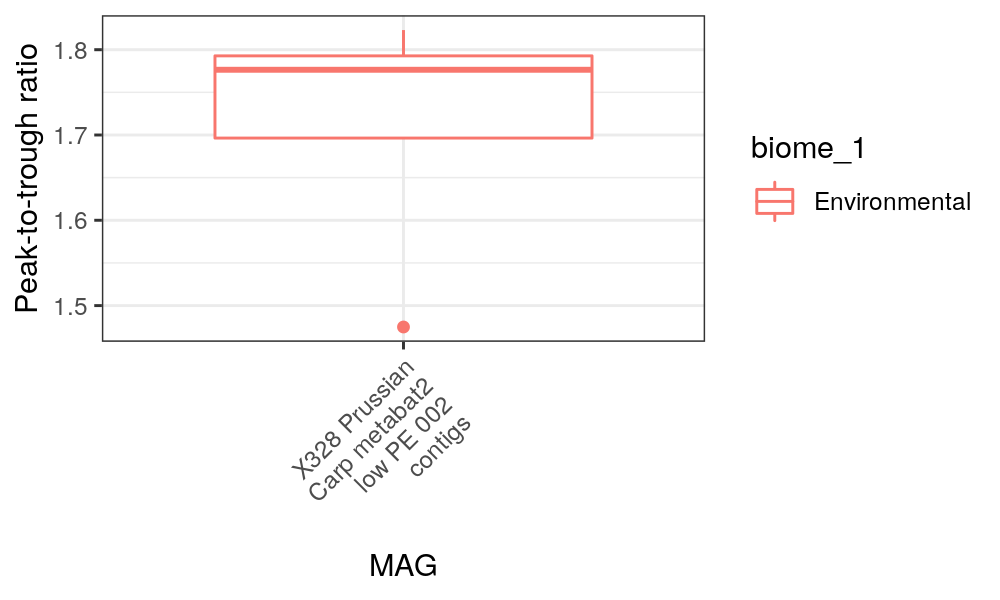

In [69]:
# MAGs found in env.
MAGs_in_env = demic_ptr_f %>%
    filter(biome_1 == 'Environmental') %>%
    .$taxon %>% unique

cat('Number of MAGs w/ env PTR values:', MAGs_in_env  %>% length, '\n')

demic_ptr_f %>%
    filter(taxon %in% MAGs_in_env) %>%
    distinct(Domain, Phylum, Class, Order, Family, Genus)

p = demic_ptr_f %>%
    filter(taxon %in% MAGs_in_env) %>%
    mutate(taxon = gsub('_+', '\n', taxon),
           taxon = stringr::str_wrap(taxon, 16)) %>%
    ggplot(aes(taxon, growth_rate, color=biome_1)) +
    geom_boxplot() +
    labs(x='MAG', y='Peak-to-trough ratio') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=45, hjust=1)
    )

dims(5, 3)
plot(p)

File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/metagenome/multi-study/08_drep95_wGeorgAnimal/.figures/2ebe543b3a573e5ef6bb269eef6d6826.RDS 


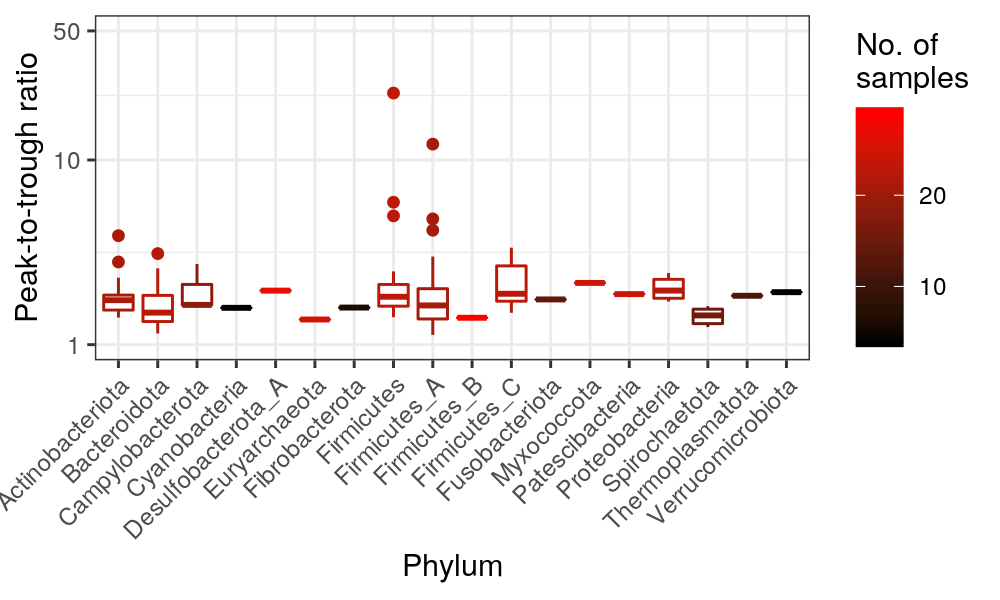

In [70]:
# PTR values for each MAG (grouped by phylum); only MAGs with >=3 PTR values shown
p = demic_ptr_f %>%
    group_by(taxon) %>%
    mutate(n_samples = n()) %>%
    ungroup() %>%
    filter(n_samples >= 3) %>%
    group_by(Phylum) %>%
    mutate(mean_n_samples = mean(n_samples)) %>%
    ungroup() %>%
    mutate(Phylum = gsub('^p__', '', Phylum)) %>%
    group_by(taxon) %>%
    summarize(growth_rate = mean(growth_rate),
              mean_n_samples = first(mean_n_samples),
              Phylum = first(Phylum)) %>%
    ungroup() %>%
    ggplot(aes(Phylum, growth_rate, color=mean_n_samples)) +
    geom_boxplot() +
    scale_color_continuous('No. of\nsamples', low='black', high='red') +
    scale_y_log10(breaks=c(1,10,50), labels=c(1,10,50), limits=c(1,50)) +
    labs(y='Peak-to-trough ratio') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=45, hjust=1)
    )

dims(5, 3)
Plot(p)

File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/metagenome/multi-study/08_drep95_wGeorgAnimal/.figures/9258af5978b2ec6f0c189d450f21673e.RDS 


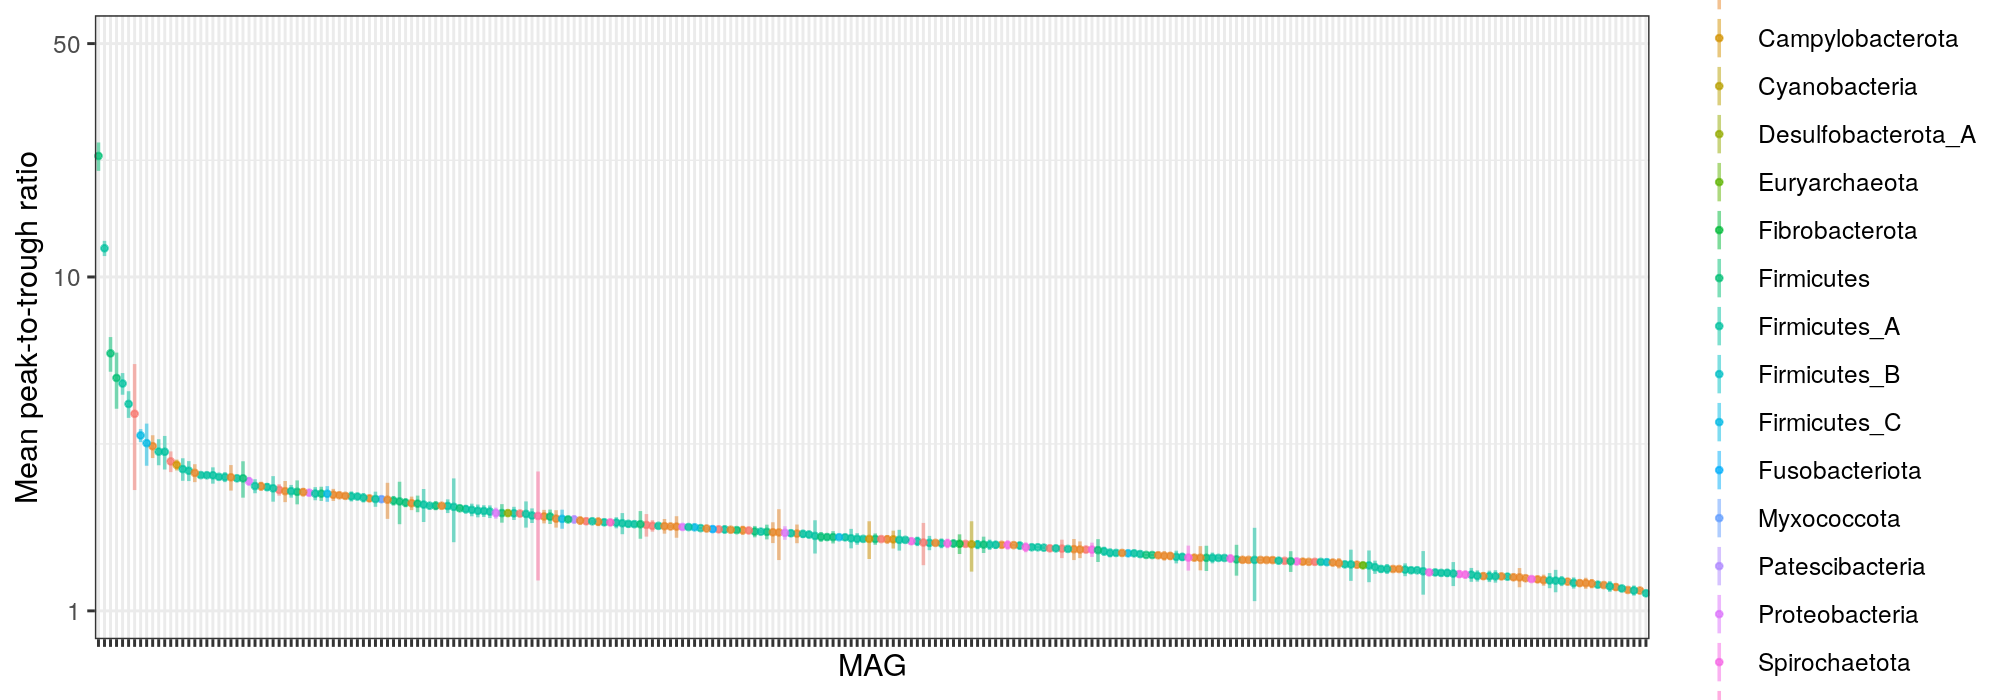

In [71]:
# PTR values for each MAG (grouped by phylum); only MAGs with >=3 PTR values shown
p = demic_ptr_f %>%
    group_by(taxon) %>%
    mutate(n_samples = n()) %>%
    ungroup() %>%
    filter(n_samples >= 3) %>%
    group_by(taxon) %>%
    summarize(mean_growth_rate = mean(growth_rate),
              sderr_growth_rate = sd(growth_rate) / sqrt(n()),
              Phylum = first(Phylum)) %>%
    ungroup() %>%
    mutate(Phylum = gsub('^p__', '', Phylum),
           taxon = taxon %>% reorder(-mean_growth_rate)) %>%
    ggplot(aes(taxon, mean_growth_rate, color=Phylum)) +
    geom_linerange(aes(ymin=mean_growth_rate-sderr_growth_rate,
                       ymax=mean_growth_rate+sderr_growth_rate),
                  alpha=0.5, size=0.6) +
    geom_point(alpha=0.7, size=0.8) +
    scale_y_log10(breaks=c(1,10,50), labels=c(1,10,50), limits=c(1,50)) +
    labs(x='MAG', y='Mean peak-to-trough ratio') +
    theme_bw() +
    theme(
        axis.text.x = element_blank() 
    )

dims(10, 3.5)
Plot(p)

File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/metagenome/multi-study/08_drep95_wGeorgAnimal/.figures/d580a0abfb42ed42836913eb67435343.RDS 


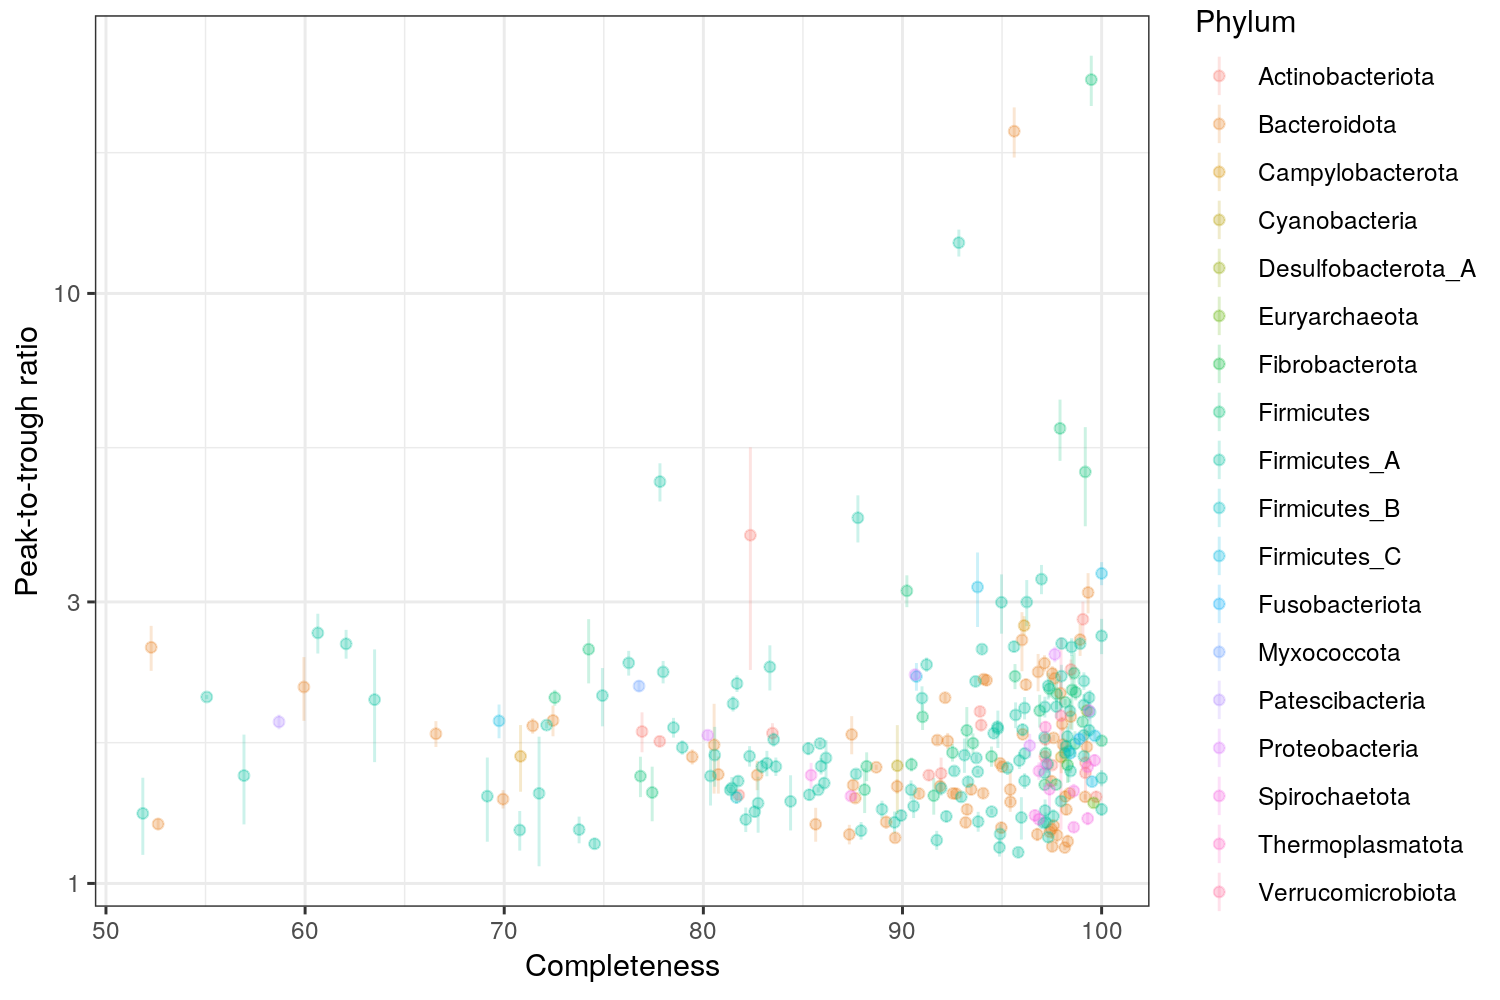

In [72]:
# outlier PTR values caused by low completeness?
p = demic_ptr_f %>%
    group_by(Phylum, taxon) %>%
    summarize(Completeness = first(Completeness),
              mean_PTR = mean(growth_rate),
              sd_PTR = sd(growth_rate),
              sderr_PTR = sd(growth_rate) / sqrt(n())) %>%
    ungroup() %>%
    mutate(Phylum = gsub('^p__', '', Phylum)) %>%
    ggplot(aes(Completeness, mean_PTR, color=Phylum)) +
    geom_linerange(aes(ymin=mean_PTR-sderr_PTR, 
                       ymax=mean_PTR+sderr_PTR),
                  alpha=0.2) +
    geom_point(alpha=0.3) +
    scale_y_log10() +
    labs(y='Peak-to-trough ratio') +
    theme_bw() 

dims(7.5, 5)
Plot(p)

# sessionInfo

In [73]:
sessionInfo()

R version 3.6.2 (2019-12-12)
Platform: x86_64-conda_cos6-linux-gnu (64-bit)
Running under: Ubuntu 18.04.3 LTS

Matrix products: default
BLAS/LAPACK: /ebio/abt3_projects/Georg_animal_feces/envs/phyloseq/lib/libopenblasp-r0.3.7.so

Random number generation:
 RNG:     Mersenne-Twister 
 Normal:  Inversion 
 Sample:  Rounding 
 
locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] parallel  stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
[1] doParallel_1.0.15 iterators_1.0.12  foreach_1.4.7     data.table_1.12.8
[5] ggplot2_3.2.1     tidyr_1.0.0       dplyr_0.8.3      

loaded via a namespace (and not attac